In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import os
import seaborn as sns 

data is copied from the json ouputs of the console running this script:

https://code.earthengine.google.com/f5ba0996dc8d6ac5cf69f931e3a573d6

# The Accuracy Assessment Notebook
## The first records quantifies the difference between balanced and unbalanced sampling
### Balanced vs Weighted vs Weighted and Tuned classifier(s)

- for each classifier we have access to the accuracy metrics (per classified year): fscore (per class), producers accuracy (per class), consumers accuracy (per class), overall accuracy (all classes) and kappa (all classes). 

- there are also records of each classifier's training and validation error (via confusion matrices). These figures are created, plotted and saved here



In [6]:
dataset = 'Meuse' 

In [7]:
root = f'../Outputs/{dataset}'

files = os.listdir(f'{root}/Trees/')

file_stem = [f'{dataset}_Max_untuned_balanced',
                f'{dataset}_Max_untuned',
                f'{dataset}_HC_tuned']

years_classified = [1990, 2000, 2006, 2012, 2018]
class_names = [f'Artificial', 'Agricultural', 'Forest and Semi-Natural', 
                   'Wetlands', 'Waterbodies', ]

colors_map = ['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2']
colors_plot = ['#E6004D', '#D7D781', '#5F9F50', '#8484FF', '#00A0C1']

In [8]:
def import_yearly_metrics_excel(file_stem, tuned, train_or_val, year):
    filename = f'{file_stem}_{tuned}_{train_or_val}_metrics_{str(year)}.xlsx'

    if filename in files:
        return pd.read_excel(f'{root}/Trees/{filename}', index_col=0)
    else:
        print(f'Not yet made: {filename}')
        

def concat_yearly_metrics(stem_no, years_classified, train_or_val, tuned):

    sheet_90 = import_yearly_metrics_excel(file_stem[stem_no], tuned, train_or_val, years_classified[0])
    sheet_00 = import_yearly_metrics_excel(file_stem[stem_no], tuned, train_or_val, years_classified[1])
    sheet_06 = import_yearly_metrics_excel(file_stem[stem_no], tuned, train_or_val, years_classified[2])
    sheet_12 = import_yearly_metrics_excel(file_stem[stem_no], tuned, train_or_val, years_classified[3])
    sheet_18 = import_yearly_metrics_excel(file_stem[stem_no], tuned, train_or_val, years_classified[4])
    
    concatenated = pd.concat([sheet_90, sheet_00, sheet_06, sheet_12, sheet_18], ignore_index=True, axis=0, keys=years_classified)
    
    return concatenated.set_index('year').replace('NaN', np.nan)

def plot_fscore(df, title, xlabel, ylabel, class_names):
    plt.figure(figsize=(10,6.18))
    o_acc = df.o_accuracy.mean()
    kappa = df.kappa.mean()
    means = df.mean()
    plt.suptitle(f'mean overall accuracy= {o_acc:.3f}, mean kappa score {kappa:.3f}', fontsize=14)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=[1990, 2000, 2006, 2012, 2018])
    plt.plot(df.iloc[:,4], c=colors_plot[0], label=f'{class_names[0]} $\mu$={means.fscore1:.3f}')
    plt.plot(df.iloc[:,5], c=colors_plot[1], label=f'{class_names[1]} $\mu$={means.fscore2:.3f}')
    plt.plot(df.iloc[:,6], c=colors_plot[2], label=f'{class_names[2]} $\mu$={means.fscore3:.3f}')
    plt.plot(df.iloc[:,7], c=colors_plot[3], label=f'{class_names[3]} $\mu$={means.fscore4:.3f}')
    plt.plot(df.iloc[:,8], c=colors_plot[4], label=f'{class_names[4]} $\mu$={means.fscore5:.3f}')
    plt.legend(bbox_to_anchor=(1,1))


C:\Users\creeb\AppData\Local\Temp\ipykernel_61932\948167764.py:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()
C:\Users\creeb\AppData\Local\Temp\ipykernel_61932\948167764.py:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()
C:\Users\creeb\AppData\Local\Temp\ipykernel_61932\948167764.py:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid c

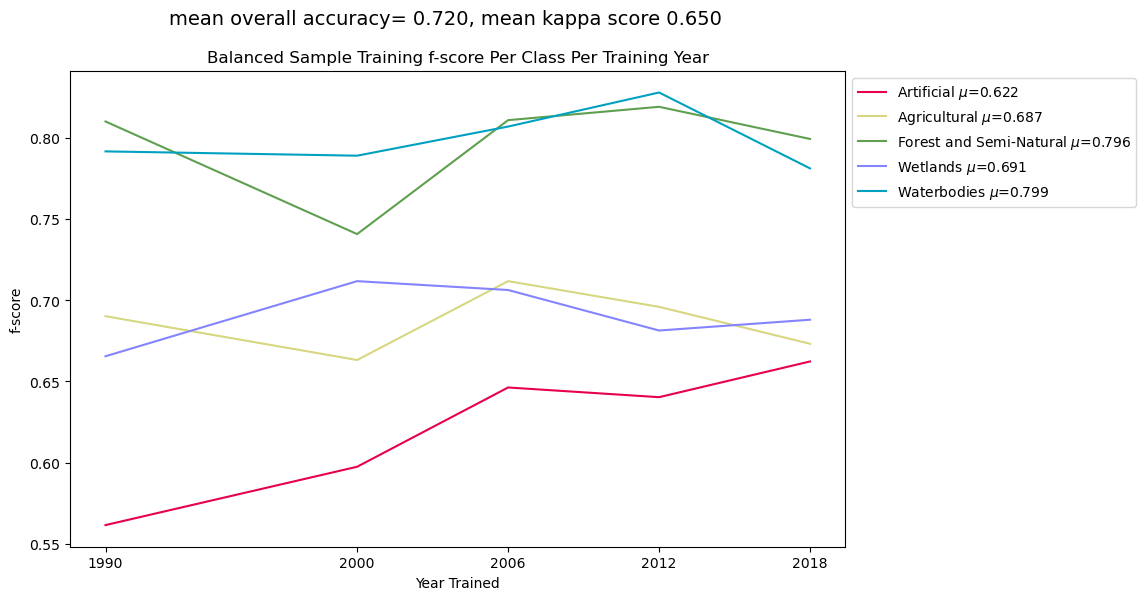

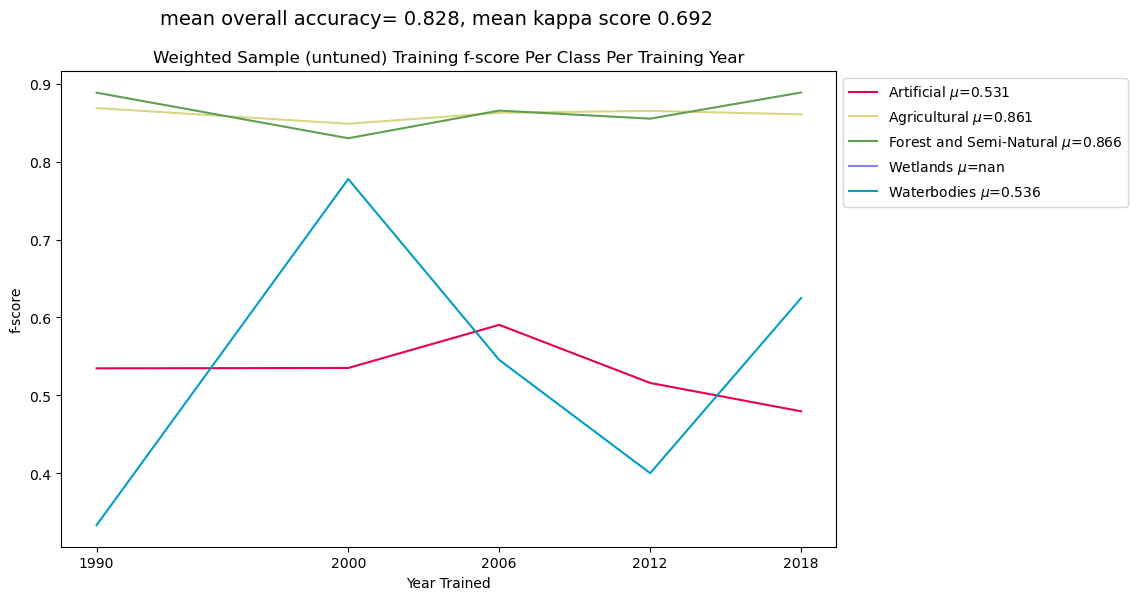

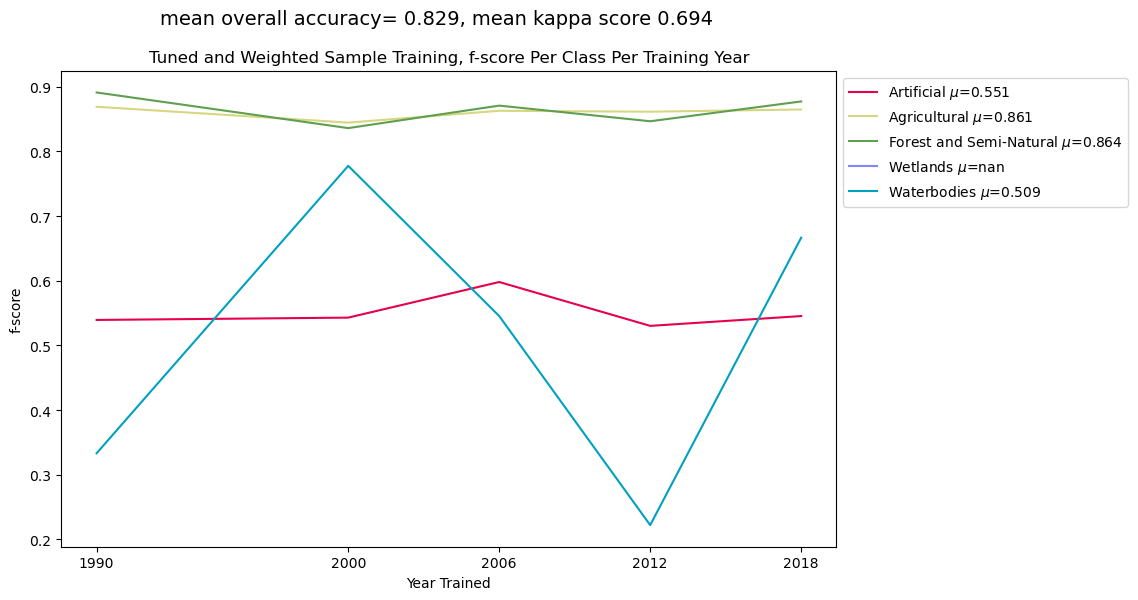

In [9]:
yearly_validation_balanced_df = concat_yearly_metrics(0, years_classified, 'validation', 'not_tuned')
yvb_df = yearly_validation_balanced_df

yearly_validation_weighted_df = concat_yearly_metrics(1, years_classified, 'validation', 'not_tuned')
yvw_df = yearly_validation_weighted_df

yearly_validation_tuned_df = concat_yearly_metrics(2, years_classified, 'validation', 'tuned')
yvt_df= yearly_validation_tuned_df




plot_fscore(yvb_df, 'Balanced Sample Training f-score Per Class Per Training Year', 'Year Trained', 'f-score', class_names)

plot_fscore(yvw_df, 'Weighted Sample (untuned) Training f-score Per Class Per Training Year', 'Year Trained', 'f-score', class_names)

plot_fscore(yvt_df, 'Tuned and Weighted Sample Training, f-score Per Class Per Training Year', 'Year Trained', 'f-score', class_names)


In [495]:
yvw_df

,train_valid,tree_name,o_accuracy,kappa,fscore1,fscore2,fscore3,fscore4,fscore5,p_accuracy1,p_accuracy2,p_accuracy3,p_accuracy4,p_accuracy5,c_accuracy1,c_accuracy2,c_accuracy3,c_accuracy4,c_accuracy5
year,,,,,,,,,,,,,,,,,,,
1990,validation,Meuse_Max_untuned_not_tuned,0.838255,0.711944,0.534653,0.868901,0.888658,NaN,0.333333,0.421875,0.918012,0.885892,0,0.250000,0.729730,0.824777,0.891441,0,0.500000
2000,validation,Meuse_Max_untuned_not_tuned,0.808586,0.659967,0.535117,0.848745,0.830146,NaN,0.777778,0.421053,0.903520,0.818182,0,0.700000,0.733945,0.800231,0.842466,0,0.875000
2006,validation,Meuse_Max_untuned_not_tuned,0.833333,0.703117,0.590476,0.862880,0.865641,NaN,0.545455,0.472081,0.906024,0.870103,0,0.375000,0.788136,0.823658,0.861224,0,1.000000
2012,validation,Meuse_Max_untuned_not_tuned,0.830021,0.687279,0.515873,0.865273,0.855305,NaN,0.400000,0.389222,0.906326,0.856223,0,0.666667,0.764706,0.827778,0.854390,0,0.285714
2018,validation,Meuse_Max_untuned_not_tuned,0.830598,0.698894,0.479452,0.860789,0.888889,NaN,0.625000,0.370370,0.908201,0.892430,0,0.555556,0.679612,0.818082,0.885375,0,0.714286


In [10]:
def import_yearly_matrices(file_stem, tuned, con_or_val, year):
    filename = f'{file_stem}_{tuned}_{con_or_val}Matrix_{str(year)}.npy'

    if filename in files:
        return np.load(f'{root}/Trees/{filename}', allow_pickle=True)
    else:
        print(f'Not yet made: {filename}')

def concat_yearly_matrices(stem_no, years_classified, con_or_val, tuned):

    mat_90 = import_yearly_matrices(file_stem[stem_no], tuned, con_or_val, years_classified[0])
    mat_00 = import_yearly_matrices(file_stem[stem_no], tuned, con_or_val, years_classified[1])
    mat_06 = import_yearly_matrices(file_stem[stem_no], tuned, con_or_val, years_classified[2])
    mat_12 = import_yearly_matrices(file_stem[stem_no], tuned, con_or_val, years_classified[3])
    mat_18 = import_yearly_matrices(file_stem[stem_no], tuned, con_or_val, years_classified[4])
    
    matrices =[(years_classified[0], mat_90), 
               (years_classified[1], mat_00), 
               (years_classified[2], mat_06), 
               (years_classified[3], mat_12), 
               (years_classified[4], mat_18)]
    
    return matrices

yearly_validation_matrices_bal = concat_yearly_matrices(0, years_classified, 'validation', 'not_tuned')
yvmb = yearly_validation_matrices_bal
# plt.matshow(yvb[0][1])

yearly_validation_wgh = concat_yearly_matrices(1, years_classified, 'validation', 'not_tuned')
yvmw = yearly_validation_wgh

yearly_validation_tuned = concat_yearly_matrices(2, years_classified, 'validation', 'tuned')
yvmt = yearly_validation_tuned
yvmt

[(1990,
  array([[ 82, 100,  10,   0,   0],
         [ 25, 737,  41,   0,   2],
         [  4,  48, 430,   0,   0],
         [  0,   1,   2,   0,   0],
         [  1,   5,   0,   0,   2]])),
 (2000,
  array([[ 82,  98,  10,   0,   0],
         [ 21, 685,  60,   0,   1],
         [  7,  69, 375,   0,   0],
         [  0,   2,   1,   0,   0],
         [  2,   1,   0,   0,   7]])),
 (2006,
  array([[ 96,  94,   7,   0,   0],
         [ 24, 749,  57,   0,   0],
         [  4,  56, 425,   0,   0],
         [  0,   3,   1,   0,   0],
         [  0,   4,   1,   0,   3]])),
 (2012,
  array([[ 70,  87,   8,   0,   2],
         [ 19, 737,  63,   0,   3],
         [  6,  65, 395,   0,   0],
         [  0,   0,   1,   0,   0],
         [  2,   0,   0,   0,   1]])),
 (2018,
  array([[ 81, 100,   8,   0,   0],
         [ 21, 746,  49,   0,   1],
         [  4,  58, 440,   0,   0],
         [  1,   2,   3,   0,   0],
         [  1,   2,   1,   0,   5]]))]

In [11]:
meuse_area_full_basin = { 
  "1": 3515.899739181923,
  "2": 15462.989230419153,
  "3": 9362.388401473556,
  "4": 67.76015865491058,
  "5": 176.2453267149072
}

area_for_weighted_sample = meuse_area_full_basin
trained_area_km = [area_for_weighted_sample[i] for i in area_for_weighted_sample.keys()]
tot = np.sum(trained_area_km)
area_full_pct= np.array([area_for_weighted_sample[i]/tot for i in area_for_weighted_sample.keys()])


train_points_w = [int(p * 5000*0.7) for p in area_full_pct]
test_points_w = [int(p * 5000*0.3) for p in area_full_pct]

points_b = np.ones_like(train_points_w) 
train_points_b = [p*1000*0.7  for p in points_b]
test_points_b = [p*1000*0.3  for p in points_b]
#np.sum(train_points) + np.sum(test_points)
#np.sum(train_points_b) + np.sum(test_points_b)
test_points_w

[184, 811, 491, 3, 9]

In [12]:
def plot_mat(matrix, training_or_validation, year, plot, balance, tuned, points, savefig=False):
    
    '''
    The function takes a matrix, and plots the confusion matrix with the keys. 
    '''
    
    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':17},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = [f'Artificial', 'Agricultural', 'Forest and Semi-Natural', 
                   'Wetlands', 'Waterbodies', ]
    
    class_names_pts = [f'Artificial ({int(points[0])})', f'Agricultural ({int(points[1])})', f'Forest and Semi-Natural ({int(points[2])})', 
                   f'Wetlands ({int(points[3])})', f'Waterbodies {int(points[4])})', ]
    
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks+0.2, class_names_pts, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    if training_or_validation == 'training':
        plt.suptitle(f'Training points, n={int(np.sum(points))} (70%)', fontsize=15)
        plt.title(f'Training Confusion Matrix for {tuned} Random Forest Model: {year}')
        
    if training_or_validation == 'validation':
        plt.suptitle(f'Validation points, n={int(np.sum(points))} (30%)', fontsize=15)
        plt.title(f'Validation Confusion Matrix for {tuned} Random Forest Model: {year}')
    
    
    if savefig == True:
        folder = f'../Outputs/Model Assessment/Matrices/'
    
        if not os.path.exists(folder):
            print(f'created {folder}')
            os.makedirs(folder)
    
        plt.savefig(f'{folder}{tuned}_{training_or_validation}_{balance}_matrix_{year}.png', bbox_inches = 'tight')
    
    if plot == True:
        plt.show()
        
    else:
        plt.close()

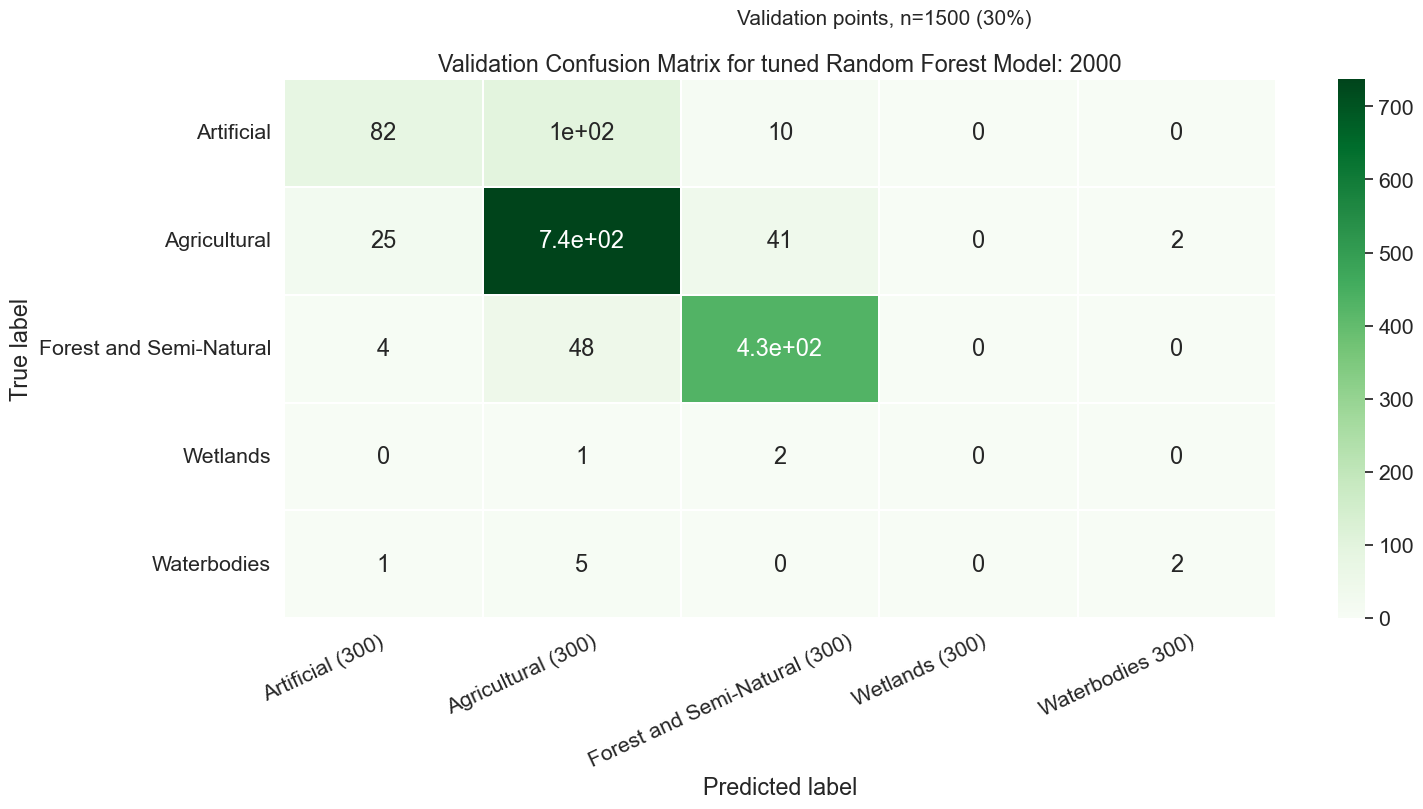

In [13]:
plot_mat(matrix=yvmt[0][1], 
         training_or_validation='validation', 
         year=yvmt[1][0], 
         plot=True, 
         balance='weighted', 
         tuned = 'tuned',
         points=test_points_b, 
         savefig=True)

In [ ]:
saving_yvmb = [plot_mat(matrix=yvmb[i][1], training_or_validation='validation', year=yvmw[i][0], plot=True, balance='balanced',tuned = 'Not Tuned', points=test_points_b,savefig=True) for i in range(len(yvmw))]

saving_yvmw = [plot_mat(matrix=yvmw[i][1], training_or_validation='validation', year=yvmw[i][0], plot=True, balance='weighted',tuned = 'Not Tuned', points=test_points_w,savefig=True) for i in range(len(yvmw))]

saving_yvmt = [plot_mat(matrix=yvmt[i][1], training_or_validation='validation', year=yvmw[i][0], plot=True
                        , balance='weighted',tuned = 'Tuned', points=test_points_w,savefig=True) for i in range(len(yvmw))]

In [15]:
kappa = 0.9903458770179364

fscore = [
  "NaN",
  0.9891225525743294,
  0.9914893617021276,
  0.9943019943019943,
  0.9963846710050615,
  0.9901129943502825
]

consAcc = [
  [
    0,
    0.9941690962099126,
    0.9943100995732574,
    0.9914772727272727,
    0.9971056439942113,
    0.9845505617977528
  ]
]

prodAcc = [
  [
    0
  ],
  [
    0.9841269841269841
  ],
  [
    0.9886845827439887
  ],
  [
    0.9971428571428571
  ],
  [
    0.9956647398843931
  ],
  [
    0.9957386363636364
  ]
]

acc = 0.7800802139037433

n_train = 3496

n_test = 1496

trainedArea= {
  "1": 93.13219868657467,
  "2": 616.996084301691,
  "3": 859.204607287953,
  "4": 2.005246516784668,
  "5": 18.19555246907815
}

classArea = {
  "1": 156.37698609461168,
  "2": 498.05656019649564,
  "3": 743.5637700042996,
  "4": 127.54671531297824,
  "5": 59.42808739821059
}

masked = sum(trainedArea.values())- sum(classArea.values())

classArea['6'] = masked



dict_balanced_1990 = {
    'errMat':np.array(EM),
    'conMat':np.array(CM)[1:][:, 1:],
    'kappa':kappa,
    'fscore':np.array(fscore[1:]),
    'consAcc':np.array(consAcc[0][1:]),
    'prodAcc':np.array(prodAcc[1:]),
    'acc':acc,
    'nTrain':n_train,
    'nTest':n_test, 
    'trainedArea':trainedArea,
    'totalArea':sum(trainedArea.values()),
    'classArea':classArea,
    'maskedArea':masked,
}

dict_balanced_1990

NameError: name 'EM' is not defined

In [ ]:
EM1 = [
  [
    86,
    42,
    10,
    0,
    7
  ],
  [
    20,
    267,
    43,
    1,
    7
  ],
  [
    9,
    30,
    797,
    0,
    6
  ],
  [
    0,
    14,
    32,
    5,
    0
  ],
  [
    10,
    8,
    8,
    0,
    87
  ]
]

CM1 = [
  [
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    345,
    4,
    4,
    0,
    2
  ],
  [
    0,
    1,
    798,
    9,
    0,
    0
  ],
  [
    0,
    1,
    6,
    1990,
    0,
    0
  ],
  [
    0,
    0,
    2,
    4,
    93,
    0
  ],
  [
    0,
    1,
    1,
    2,
    0,
    233
  ]
]

kappa1 = 0.9824400619414352



fscore1 = [
  "NaN",
  0.9815078236130867,
  0.9857936998147004,
  0.9935097353969048,
  0.96875,
  0.9872881355932204
]

consAcc1 = [
  [
    0,
    0.9913793103448276,
    0.9839704069050554,
    0.9905425584868094,
    1,
    0.9914893617021276
  ]
]

prodAcc1 = [
  [
    0
  ],
  [
    0.971830985915493
  ],
  [
    0.9876237623762376
  ],
  [
    0.9964947421131698
  ],
  [
    0.9393939393939394
  ],
  [
    0.9831223628691983
  ]
]

acc1 = 0.8341168569509738

n_train1 = 3496

n_test1 = 1489
trainedArea1= {
  "1": 93.13219868657467,
  "2": 616.996084301691,
  "3": 859.204607287953,
  "4": 2.005246516784668,
  "5": 18.19555246907815
}

classArea1 = {
  "1": 91.21847979495443,
  "2": 573.5377948891445,
  "3": 888.2540452009717,
  "4": 1.7154349869995118,
  "5": 30.246364134525315
}

masked = sum(trainedArea1.values())- sum(classArea1.values())

classArea1['6'] = masked

dict_weighted_1990 = {
    'errMat':np.array(EM1),
    'conMat':np.array(CM1)[1:][:, 1:],
    'kappa':kappa1,
    'fscore':np.array(fscore1[1:]),
    'consAcc':np.array(consAcc1[0][1:]),
    'prodAcc':np.array(prodAcc1[1:]),
    'acc':acc1,
    'nTrain':n_train1,
    'nTest':n_test1, 
    'trainedArea':trainedArea1,
    'totalArea':sum(trainedArea1.values()),
    'classArea':classArea1,
    'maskedArea':sum(trainedArea1.values())- sum(classArea1.values()),
}


dict_weighted_1990

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dict_balanced_1990['conMat'], display_labels=[1,2,3,4,5])
cm_display.plot()
plt.show()

print('producers accuracy\n', dict_balanced_1990['prodAcc'])
print('consumers accuracy\n', dict_balanced_1990['consAcc'])



plt.title('Pie Chart of Trained Area Chooz 1990')
explode = (0, 0, 0.1, 0.3, 0.5) 
plt.pie(dict_balanced_1990['trainedArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2'], autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.title('Pie Chart of Classified Area Chooz 1990 Balanced')
explode = (0, 0, 0.1, 0.3, 0.5, 1) 
plt.pie(dict_balanced_1990['classArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies', 'masked'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2', '#0a1a29'], autopct='%1.1f%%', shadow=True)
plt.show()


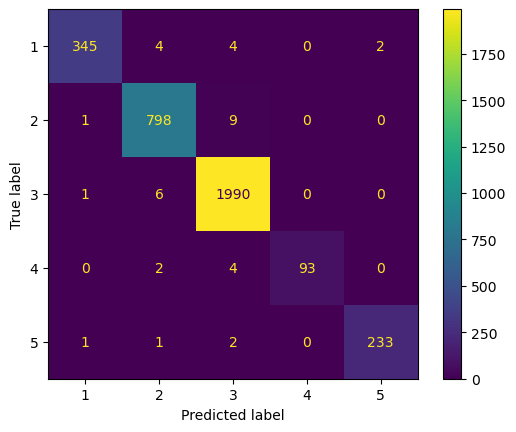

producers accuracy
 [[0.97183099]
 [0.98762376]
 [0.99649474]
 [0.93939394]
 [0.98312236]]
consumers accuracy
 [0.99137931 0.98397041 0.99054256 1.         0.99148936]


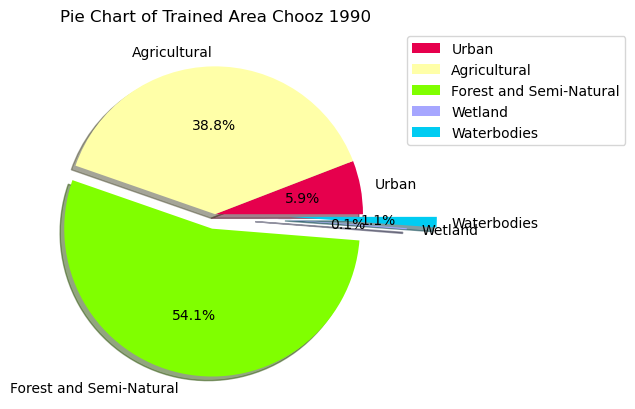

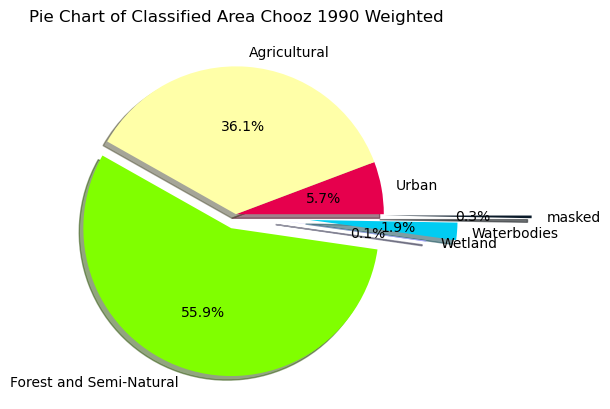

In [7]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dict_weighted_1990['conMat'], display_labels=[1,2,3,4,5])
cm_display.plot()
plt.show()

print('producers accuracy\n', dict_weighted_1990['prodAcc'])
print('consumers accuracy\n', dict_weighted_1990['consAcc'])


plt.title('Pie Chart of Trained Area Chooz 1990')
explode = (0, 0, 0.1, 0.3, 0.5) 
plt.pie(dict_weighted_1990['trainedArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2'], autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.title('Pie Chart of Classified Area Chooz 1990 Weighted')
explode = (0, 0, 0.1, 0.3, 0.5, 1) 
plt.pie(dict_weighted_1990['classArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies', 'masked'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2', '#0a1a29'], autopct='%1.1f%%', shadow=True)
plt.show()

In [16]:
null=np.nan

n_trees = [
  {
    "acc1": 0.9692664540446506,
    "fscore": [
      "NaN",
      0.9309912170639899,
      0.9754682141915062,
      0.9747228381374724,
      0.8235294117647058,
      0.8947368421052632
    ],
    "kappa": 0.9468060170133329,
    "numTrees": 10,
    "testingAccuracy": 0.8319327731092437
  },
  {
    "acc1": 0.9736155407364453,
    "fscore": [
      "NaN",
      0.9411764705882354,
      0.9785544082605243,
      0.9788172992056486,
      0.8235294117647058,
      0.9230769230769231
    ],
    "kappa": 0.9544197224133951,
    "numTrees": 15,
    "testingAccuracy": 0.8442146089204913
  },
  {
    "acc1": 0.9753551754131632,
    "fscore": [
      "NaN",
      0.9450000000000001,
      0.9801954053340374,
      0.9791389258766089,
      0.8235294117647058,
      0.975609756097561
    ],
    "kappa": 0.9573968581518024,
    "numTrees": 20,
    "testingAccuracy": 0.8422753716871364
  },
  {
    "acc1": 0.9782545665410264,
    "fscore": [
      "NaN",
      0.9538077403245943,
      0.9822891884747554,
      0.9818342933097033,
      0.7499999999999999,
      0.975609756097561
    ],
    "kappa": 0.9624231193800826,
    "numTrees": 25,
    "testingAccuracy": 0.8468002585649644
  },
  {
    "acc1": 0.9820237750072485,
    "fscore": [
      "NaN",
      0.9603960396039604,
      0.9849166446149775,
      0.9858030168589175,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9689724719525006,
    "numTrees": 30,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.984343287909539,
    "fscore": [
      "NaN",
      0.9679012345679012,
      0.9870060991779368,
      0.9867256637168141,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9730050483455541,
    "numTrees": 35,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.985213105247898,
    "fscore": [
      "NaN",
      0.9704433497536946,
      0.9880668257756563,
      0.9867139061116031,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9745100363498511,
    "numTrees": 40,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.9831835314583938,
    "fscore": [
      "NaN",
      0.9678217821782178,
      0.9861995753715499,
      0.9840989399293286,
      0.888888888888889,
      1
    ],
    "kappa": 0.9710135561420539,
    "numTrees": 45,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9866628008118296,
    "fscore": [
      "NaN",
      0.9754299754299753,
      0.9888416578108394,
      0.9876215738284704,
      0.888888888888889,
      1
    ],
    "kappa": 0.9770349436404103,
    "numTrees": 50,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9869527399246159,
    "fscore": [
      "NaN",
      0.976629766297663,
      0.9896304174421697,
      0.9867608120035305,
      0.888888888888889,
      1
    ],
    "kappa": 0.9775391615691227,
    "numTrees": 55,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9878225572629747,
    "fscore": [
      "NaN",
      0.981640146878825,
      0.9896083133493205,
      0.9872190392243279,
      0.9473684210526316,
      1
    ],
    "kappa": 0.979066705529972,
    "numTrees": 60,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9875326181501884,
    "fscore": [
      "NaN",
      0.9741060419235512,
      0.9898936170212767,
      0.9889819303657998,
      0.888888888888889,
      1
    ],
    "kappa": 0.9785353149768523,
    "numTrees": 65,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 0.9886923746013337,
    "fscore": [
      "NaN",
      0.9791411042944784,
      0.9909526343799894,
      0.9889722099691223,
      0.888888888888889,
      1
    ],
    "kappa": 0.9805442732014437,
    "numTrees": 70,
    "testingAccuracy": 0.8345184227537169
  },
  {
    "acc1": 0.9898521310524789,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9922810753260579,
      0.9889722099691223,
      0.888888888888889,
      1
    ],
    "kappa": 0.982543421278299,
    "numTrees": 75,
    "testingAccuracy": 0.8358112475759535
  },
  {
    "acc1": 0.9901420701652653,
    "fscore": [
      "NaN",
      0.9803921568627452,
      0.9928134149587436,
      0.9902912621359223,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9830448973477888,
    "numTrees": 80,
    "testingAccuracy": 0.8364576599870718
  },
  {
    "acc1": 0.9884024354885474,
    "fscore": [
      "NaN",
      0.9753694581280788,
      0.9909670563230606,
      0.9893992932862191,
      0.888888888888889,
      1
    ],
    "kappa": 0.9800262629450694,
    "numTrees": 85,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 0.9904320092780516,
    "fscore": [
      "NaN",
      0.981640146878825,
      0.9925531914893616,
      0.9907120743034057,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9835425940950452,
    "numTrees": 90,
    "testingAccuracy": 0.8364576599870718
  },
  {
    "acc1": 0.9907219483908379,
    "fscore": [
      "NaN",
      0.9815950920245399,
      0.9928172386272945,
      0.9911660777385158,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9840397386906333,
    "numTrees": 95,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 0.9921716439547695,
    "fscore": [
      "NaN",
      0.9865689865689866,
      0.9941458222458754,
      0.9915966386554622,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9865405364388926,
    "numTrees": 100,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9913018266164105,
    "fscore": [
      "NaN",
      0.9878048780487805,
      0.9933386624034105,
      0.9898454746136865,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9850546594738755,
    "numTrees": 105,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9904320092780516,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9925492283129324,
      0.9907202828104286,
      0.9473684210526316,
      0.9523809523809523
    ],
    "kappa": 0.9835470928094477,
    "numTrees": 110,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.9907219483908379,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9930777422790202,
      0.9907366563740626,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9840439819841338,
    "numTrees": 115,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9936068193926478,
      0.992063492063492,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9855453212224703,
    "numTrees": 120,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 0.9933314004059147,
    "fscore": [
      "NaN",
      0.9865689865689866,
      0.994937383426592,
      0.9933833259814734,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9885388910087213,
    "numTrees": 125,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9921716439547695,
    "fscore": [
      "NaN",
      0.9865689865689866,
      0.9938715694111377,
      0.9916188795765329,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9865456546624121,
    "numTrees": 130,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9933422103861518,
      0.9916188795765329,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9855429331710627,
    "numTrees": 135,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9924615830675558,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9941395844432604,
      0.9929453262786596,
      0.9473684210526316,
      1
    ],
    "kappa": 0.987039893005482,
    "numTrees": 140,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.9933314004059147,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9949400798934753,
      0.9938217122683143,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9885352319734165,
    "numTrees": 145,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9930414612931284,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9946751863684772,
      0.9933774834437087,
      0.9473684210526316,
      1
    ],
    "kappa": 0.988035470372699,
    "numTrees": 150,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9930414612931284,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9944104338568007,
      0.9938162544169612,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9880341766673384,
    "numTrees": 155,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9930414612931284,
    "fscore": [
      "NaN",
      0.9878048780487805,
      0.9946695095948828,
      0.9925011027790032,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9880431058341715,
    "numTrees": 160,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9930414612931284,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9944074567243675,
      0.9938217122683143,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9880367637983477,
    "numTrees": 165,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9933314004059147,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.994937383426592,
      0.9938271604938272,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9885377102354184,
    "numTrees": 170,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9927515221803421,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9944074567243675,
      0.9933833259814734,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9875370113543644,
    "numTrees": 175,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9930414612931284,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9946751863684772,
      0.9938217122683143,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9880342372079193,
    "numTrees": 180,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.9942012177442737,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9957401490947817,
      0.9951434878587195,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9900295586439162,
    "numTrees": 185,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.993621339518701,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952102182011708,
      0.9942554131683606,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9890301424586602,
    "numTrees": 190,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9933314004059147,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9949454642192073,
      0.9938107869142353,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9885302722330711,
    "numTrees": 195,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.993621339518701,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952102182011708,
      0.9942554131683606,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9890301424586602,
    "numTrees": 200,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952102182011708,
      0.9951391957578436,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9895287723469031,
    "numTrees": 205,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9949427734894862,
      0.9955830388692579,
      1,
      1
    ],
    "kappa": 0.9895305175245194,
    "numTrees": 210,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9947810959698463,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9957401490947817,
      0.9964664310954063,
      1,
      1
    ],
    "kappa": 0.9910280526183137,
    "numTrees": 215,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9942012177442737,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952102182011708,
      0.995579133510168,
      1,
      1
    ],
    "kappa": 0.9900290138639786,
    "numTrees": 220,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9952102182011708,
      0.9951391957578436,
      1,
      1
    ],
    "kappa": 0.9895293854200715,
    "numTrees": 225,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9942012177442737,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9954751131221719,
      0.9951391957578436,
      1,
      1
    ],
    "kappa": 0.9900300918364695,
    "numTrees": 230,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952076677316294,
      0.9946996466431095,
      1,
      1
    ],
    "kappa": 0.9895327280546994,
    "numTrees": 235,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9942012177442737,
    "fscore": [
      "NaN",
      0.9865689865689866,
      0.9954727030625833,
      0.9946996466431095,
      1,
      1
    ],
    "kappa": 0.9900332739539164,
    "numTrees": 240,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9952076677316294,
      0.9951434878587195,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9895310365761117,
    "numTrees": 245,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.9865689865689866,
      0.9952051145444858,
      0.9947043248014122,
      0.9473684210526316,
      1
    ],
    "kappa": 0.9895343781567623,
    "numTrees": 250,
    "testingAccuracy": 0.8409825468648998
  }
]


In [17]:
def plot_optimum(year, var_sing, var_long, JSvar, opt, numcatchment):
    var = [('accuracy', 'kappa',var_long, 'f1', 'f2', 'f3', 'f4', 'f5')]
    runs = [JSvar]

    for j in runs:
        for feature in j:
            a = feature['testingAccuracy']
            k = feature['kappa']
            f1 = feature['fscore'][1]
            f2 = feature['fscore'][2]
            f3 = feature['fscore'][3]
            f4 = feature['fscore'][4]
            f5 = feature['fscore'][5]
            n = feature[var_long]
            var.append((a, k, n, f1, f2, f3, f4, f5))

    df = pd.DataFrame(var[1:], columns=var[0])
    df.to_excel('../Outputs/Meuse/RF_classification/tuning/'+var_long+'_'+str(year)+'.xlsx', index=[0])
    df = pd.read_excel('../Outputs/Meuse/RF_classification/tuning/'+var_long+'_'+str(year)+'.xlsx', index_col=0)
    
    '''
    Plotting
    '''
    plt.figure(figsize=(10,6.18))
    plt.title(f'Meuse {var_long} tuning:  {year}, {numcatchment} catchments')

    maxAcc = df.loc[df.accuracy.idxmax()].accuracy
    maxKap = df.loc[df.kappa.idxmax()].kappa
    var_acc_loc = df.loc[df.accuracy.idxmax()].loc[var_long]
    var_kap_loc = df.loc[df.kappa.idxmax()].loc[var_long]
    
    plt.axvline(var_acc_loc, c='blue',linestyle='dashed', label=f'maxAcc={100*maxAcc:.2f}%, {var_acc_loc:.2f} {var_sing}')
    plt.axvline(var_kap_loc, c='orange',linestyle='dashed', label=f'maxKap={100*maxKap:.2f}%, {var_kap_loc:.2f} {var_sing}')
    plt.fill_betweenx([0,1], [var_acc_loc, var_acc_loc], [var_kap_loc,var_kap_loc], color = 'blue', alpha=0.1, label=f'Parameter Space')
    plt.scatter(df.loc[:, var_long], df.accuracy, label='Overall Accuracy', c='blue')
    plt.scatter(df.loc[:, var_long], df.kappa, label='Kappa', c='orange')
    plt.xlim(df.loc[:, var_long].min()*0.95,df.loc[:, var_long].max()*1.05)
    plt.ylim(df.accuracy.min()*0.9, df.kappa.max()*1.1)
    
    if opt is not None:
        chosen_k = df.kappa[df.loc[:, var_long] == opt].values[0]*100
        chosen_a = df.accuracy[df.loc[:, var_long] == opt].values[0]*100
        print(df.keys())
        plt.axvline(opt, color='red', linestyle='dashed', label=f'Chosen = {opt:.2f} {var_sing}\n($\kappa$={chosen_k:.2f}%, acc={chosen_a:.2f}%)')
    
    plt.xlabel(var_long)
    plt.ylabel('accuracy or kappa score')
    plt.legend()
    
def rep_nan(i):
    if i == 'NaN':
        return np.nan
    else:
        return i

def plot_fscore(param_dict, opt, chosen, varInd, varLong):
    ax = plt.figure(figsize=(10,6.18))
    trees = []
    f1_l = []
    f2_l = []
    f3_l = []
    f4_l = [] 
    f5_l = []

    for i in param_dict:
        fscore = i['fscore'] 
        f1, f2, f3, f4, f5 = fscore[1], fscore[2], fscore[3], fscore[4], fscore[5]
        
        f1_l.append(f1)
        f2_l.append(f2)
        f3_l.append(f3)
        f4_l.append(f4)
        f5_l.append(f5)
        
        tree = i[varInd]
        trees.append(tree)

    f1_r = [rep_nan(i) for i in f1_l]    
    f2_r = [rep_nan(i) for i in f2_l]
    f3_r = [rep_nan(i) for i in f3_l]
    f4_r = [rep_nan(i) for i in f4_l]
    f5_r = [rep_nan(i) for i in f5_l]
    
    plt.scatter(trees, f1_r, c='red')
    plt.scatter(trees, f2_r, c='orange')
    plt.scatter(trees, f3_r, c='green')
    plt.scatter(trees, f4_r, c='purple')
    plt.scatter(trees, f5_r, c='blue')
    
    
    
    
    plt.ylabel('f-Score')
    plt.xlabel(varLong)
    plt.legend(['artificial', 'agricultural', 'forest and seminatural', 'wetland', 'waterbody'])

    plt.axvline(opt, linestyle='dotted', label=f'optimum choice {opt}')
    plt.axvline(chosen, color='red', linestyle='dashed', label=f'actual choice {chosen}')
    plt.legend()
    
    

### Tuning the classifier year 2018

Index(['accuracy', 'kappa', 'numTrees', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


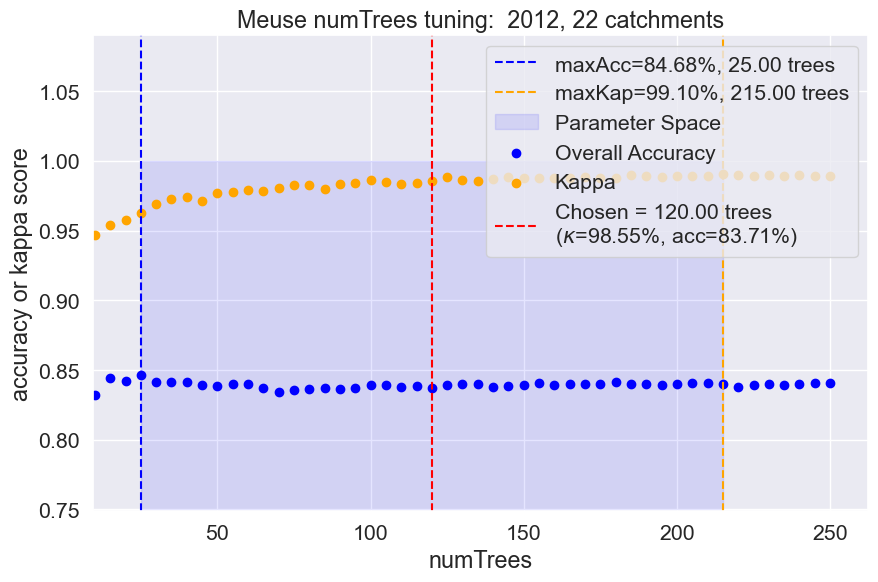

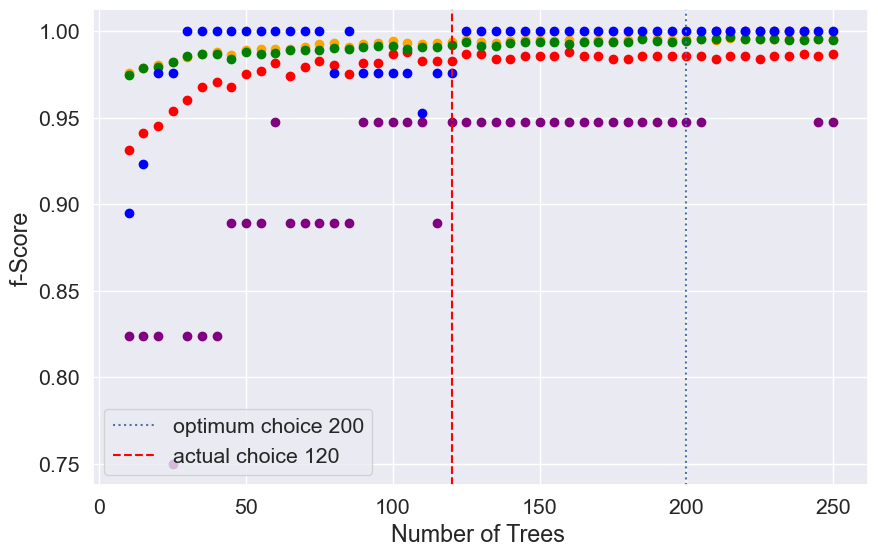

In [18]:
plot_optimum(2012, 'trees', 'numTrees', n_trees, 120, 22)
plot_fscore(n_trees, 200, 120, 'numTrees', 'Number of Trees ')

In [19]:
VPS = [
  {
    "acc1": 0.9866628008118296,
    "fscore": [
      "NaN",
      0.9778325123152709,
      0.9901254336802775,
      0.9851007887817704,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9770687074448436,
    "testingAccuracy": 0.8371040723981901,
    "variablesPerSplit": 1
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9936136242682276,
      0.9920564872021184,
      0.888888888888889,
      1
    ],
    "kappa": 0.9855344129144785,
    "testingAccuracy": 0.8403361344537815,
    "variablesPerSplit": 2
  },
  {
    "acc1": 0.9918817048419832,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9938780942241149,
      0.9920564872021184,
      0.888888888888889,
      1
    ],
    "kappa": 0.9860361767881444,
    "testingAccuracy": 0.8403361344537815,
    "variablesPerSplit": 3
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9936068193926478,
      0.992063492063492,
      0.9473684210526316,
      0.975609756097561
    ],
    "kappa": 0.9855453212224703,
    "testingAccuracy": 0.8371040723981901,
    "variablesPerSplit": 4
  },
  {
    "acc1": 0.9901420701652653,
    "fscore": [
      "NaN",
      0.9815950920245399,
      0.9922933829391443,
      0.9902740937223695,
      0.888888888888889,
      1
    ],
    "kappa": 0.9830294168256039,
    "testingAccuracy": 0.8377504848093084,
    "variablesPerSplit": 5
  },
  {
    "acc1": 0.9910118875036242,
    "fscore": [
      "NaN",
      0.9815950920245399,
      0.99308142629058,
      0.9916188795765329,
      0.888888888888889,
      1
    ],
    "kappa": 0.9845351915190961,
    "testingAccuracy": 0.8461538461538461,
    "variablesPerSplit": 6
  },
  {
    "acc1": 0.9904320092780516,
    "fscore": [
      "NaN",
      0.9815950920245399,
      0.9925571504518873,
      0.9907202828104286,
      0.888888888888889,
      1
    ],
    "kappa": 0.9835303344593642,
    "testingAccuracy": 0.8468002585649644,
    "variablesPerSplit": 7
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9936102236421726,
      0.9911738746690203,
      0.888888888888889,
      1
    ],
    "kappa": 0.9855405234272404,
    "testingAccuracy": 0.8383968972204267,
    "variablesPerSplit": 8
  },
  {
    "acc1": 0.9921716439547695,
    "fscore": [
      "NaN",
      0.9840881272949816,
      0.9941458222458754,
      0.9924944812362031,
      0.888888888888889,
      1
    ],
    "kappa": 0.9865334282557232,
    "testingAccuracy": 0.843568196509373,
    "variablesPerSplit": 9
  },
  {
    "acc1": 0.9907219483908379,
    "fscore": [
      "NaN",
      0.9804400977995109,
      0.9928134149587436,
      0.9916114790286975,
      0.888888888888889,
      1
    ],
    "kappa": 0.9840429900077842,
    "testingAccuracy": 0.8403361344537815,
    "variablesPerSplit": 10
  },
  {
    "acc1": 0.9913018266164105,
    "fscore": [
      "NaN",
      0.9791411042944784,
      0.9936170212765957,
      0.9929328621908127,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9850332163657086,
    "testingAccuracy": 0.8429217840982547,
    "variablesPerSplit": 11
  },
  {
    "acc1": 0.9913018266164105,
    "fscore": [
      "NaN",
      0.9803921568627452,
      0.9933528316936985,
      0.9924878479893946,
      0.888888888888889,
      1
    ],
    "kappa": 0.9850307414492071,
    "testingAccuracy": 0.8416289592760181,
    "variablesPerSplit": 12
  },
  {
    "acc1": 0.9910118875036242,
    "fscore": [
      "NaN",
      0.9803921568627452,
      0.99308142629058,
      0.9920564872021184,
      0.888888888888889,
      1
    ],
    "kappa": 0.9845367862189254,
    "testingAccuracy": 0.8422753716871364,
    "variablesPerSplit": 13
  },
  {
    "acc1": 0.9904320092780516,
    "fscore": [
      "NaN",
      0.9778869778869779,
      0.9925492283129324,
      0.992063492063492,
      0.888888888888889,
      1
    ],
    "kappa": 0.9835357640058187,
    "testingAccuracy": 0.8416289592760181,
    "variablesPerSplit": 14
  },
  {
    "acc1": 0.9904320092780516,
    "fscore": [
      "NaN",
      0.9791411042944784,
      0.9925492283129324,
      0.9916188795765329,
      0.888888888888889,
      1
    ],
    "kappa": 0.9835374619396829,
    "testingAccuracy": 0.8429217840982547,
    "variablesPerSplit": 15
  },
  {
    "acc1": 0.9910118875036242,
    "fscore": [
      "NaN",
      0.9803921568627452,
      0.99308142629058,
      0.9920564872021184,
      0.888888888888889,
      1
    ],
    "kappa": 0.9845367862189254,
    "testingAccuracy": 0.8422753716871364,
    "variablesPerSplit": 16
  },
  {
    "acc1": 0.9907219483908379,
    "fscore": [
      "NaN",
      0.9778869778869779,
      0.9930851063829788,
      0.9924944812362031,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9840337841239383,
    "testingAccuracy": 0.8422753716871364,
    "variablesPerSplit": 17
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.9803439803439803,
      0.9938846051582026,
      0.9929328621908127,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9855290509860749,
    "testingAccuracy": 0.8377504848093084,
    "variablesPerSplit": 18
  },
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.9803439803439803,
      0.9938813514232508,
      0.9929390997352163,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9855321823997185,
    "testingAccuracy": 0.8364576599870718,
    "variablesPerSplit": 19
  }
]

Index(['accuracy', 'kappa', 'variablesPerSplit', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


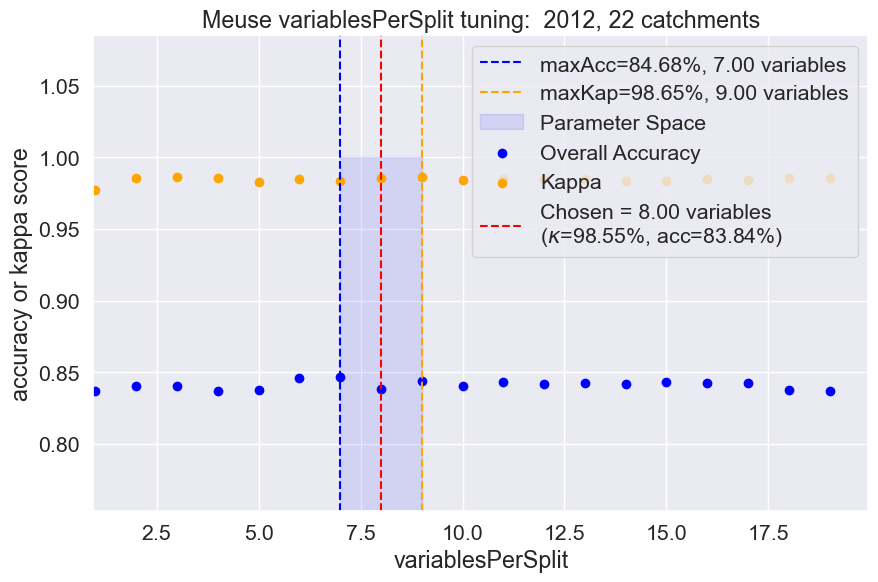

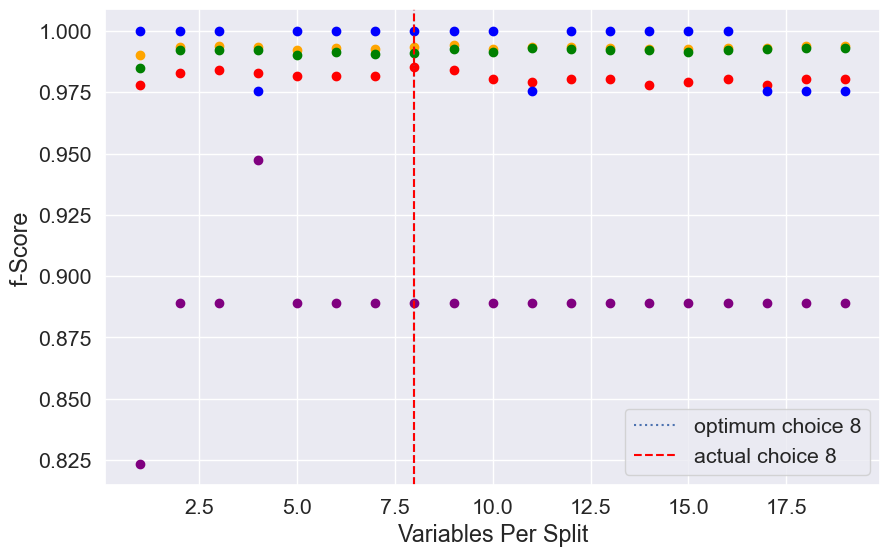

In [20]:
#plot_optimum(2018, 'trees', 'numTrees', n_trees, 90, 22)

plot_optimum(2012, 'variables', 'variablesPerSplit', VPS, 8, 22)
plot_fscore(VPS, 8, 8, 'variablesPerSplit', 'Variables Per Split')


In [21]:
MLP = [
  {
    "acc1": 0.9915917657291968,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9936102236421726,
      0.9911738746690203,
      0.888888888888889,
      1
    ],
    "kappa": 0.9855405234272404,
    "minimumLeafPopulation": 1,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9579588286459844,
    "fscore": [
      "NaN",
      0.9384800965018093,
      0.9671829876608034,
      0.957619477006312,
      "NaN",
      0.6874999999999999
    ],
    "kappa": 0.927180376960457,
    "minimumLeafPopulation": 2,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.9254856480139171,
    "fscore": [
      "NaN",
      0.8328981723237598,
      0.9420628734736296,
      0.9375,
      "NaN",
      0.6060606060606061
    ],
    "kappa": 0.8695328166415267,
    "minimumLeafPopulation": 3,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9130182661641055,
    "fscore": [
      "NaN",
      0.7886944818304172,
      0.9308208569953537,
      0.9324384787472036,
      "NaN",
      0.6111111111111112
    ],
    "kappa": 0.8469880514038518,
    "minimumLeafPopulation": 4,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.8993911278631488,
    "fscore": [
      "NaN",
      0.7399165507649513,
      0.9193631227529532,
      0.9245198749441715,
      "NaN",
      0.6111111111111112
    ],
    "kappa": 0.8221727763666312,
    "minimumLeafPopulation": 5,
    "testingAccuracy": 0.8429217840982547
  },
  {
    "acc1": 0.8915627718179182,
    "fscore": [
      "NaN",
      0.7144866385372715,
      0.9134664618535586,
      0.9189431258396776,
      "NaN",
      0.5789473684210527
    ],
    "kappa": 0.8079804623053699,
    "minimumLeafPopulation": 6,
    "testingAccuracy": 0.8442146089204913
  },
  {
    "acc1": 0.8831545375471151,
    "fscore": [
      "NaN",
      0.6931818181818182,
      0.9060179257362356,
      0.9120928157072736,
      "NaN",
      0.5789473684210527
    ],
    "kappa": 0.7929604771802466,
    "minimumLeafPopulation": 7,
    "testingAccuracy": 0.843568196509373
  },
  {
    "acc1": 0.8773557552913888,
    "fscore": [
      "NaN",
      0.6550218340611352,
      0.9014514896867839,
      0.9119356280733124,
      "NaN",
      0.5945945945945946
    ],
    "kappa": 0.7817203897271487,
    "minimumLeafPopulation": 8,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.8741664250507394,
    "fscore": [
      "NaN",
      0.65,
      0.8987277353689568,
      0.9076305220883535,
      "NaN",
      0.5945945945945946
    ],
    "kappa": 0.7758013982737709,
    "minimumLeafPopulation": 9,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.8701072774717309,
    "fscore": [
      "NaN",
      0.6331360946745562,
      0.8953783646521077,
      0.9056772463120251,
      "NaN",
      0.5945945945945946
    ],
    "kappa": 0.7682624936222213,
    "minimumLeafPopulation": 10,
    "testingAccuracy": 0.8416289592760181
  }
]


Index(['accuracy', 'kappa', 'minimumLeafPopulation', 'f1', 'f2', 'f3', 'f4',
       'f5'],
      dtype='object')


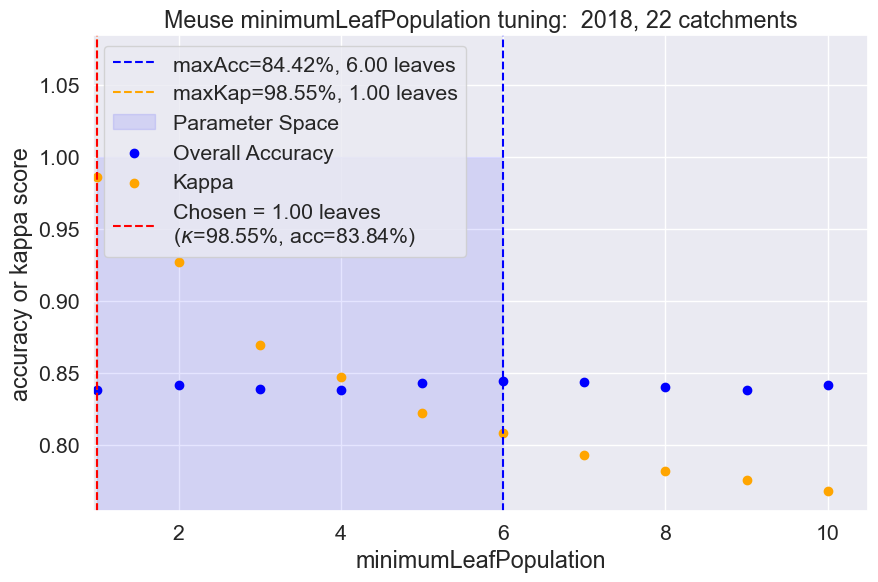

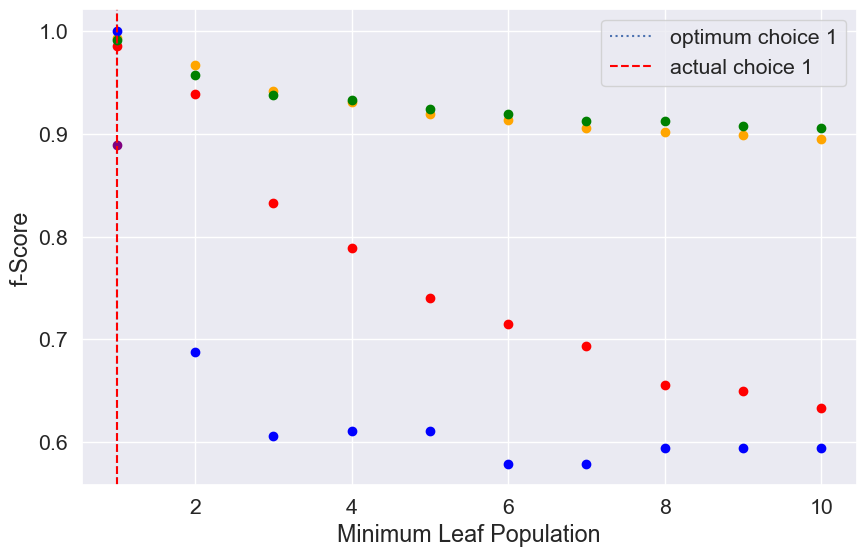

In [22]:
plot_optimum(2018, 'leaves', 'minimumLeafPopulation', MLP, 1, 22)
plot_fscore(MLP, 1,1,'minimumLeafPopulation','Minimum Leaf Population')

# plot_optimum(2012, 'variables', 'variablesPerSplit', VPS, 8, 22)
# plot_fscore(VPS, 8, 8, 'variablesPerSplit', 'Variables Per Split')

In [23]:
BF = [
  {
    "acc1": 0.8472020875616121,
    "bagFraction": 0.05,
    "fscore": [
      "NaN",
      0.5376344086021506,
      0.8786333503314636,
      0.8887915936952714,
      "NaN",
      0.5806451612903226
    ],
    "kappa": 0.726885851420631,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.8616990432009278,
    "bagFraction": 0.1,
    "fscore": [
      "NaN",
      0.5960061443932412,
      0.8900229650421025,
      0.8962800875273522,
      "NaN",
      0.6060606060606061
    ],
    "kappa": 0.7529635624284027,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.8724267903740215,
    "bagFraction": 0.15000000000000002,
    "fscore": [
      "NaN",
      0.6375939849624059,
      0.8955833546081184,
      0.9092511013215859,
      "NaN",
      0.6111111111111112
    ],
    "kappa": 0.7726310780576466,
    "testingAccuracy": 0.8429217840982547
  },
  {
    "acc1": 0.8883734415772687,
    "bagFraction": 0.2,
    "fscore": [
      "NaN",
      0.6852941176470588,
      0.9082545361615129,
      0.9221238938053097,
      "NaN",
      0.6857142857142857
    ],
    "kappa": 0.8014264355202873,
    "testingAccuracy": 0.8442146089204913
  },
  {
    "acc1": 0.9017106407654393,
    "bagFraction": 0.25,
    "fscore": [
      "NaN",
      0.7422096317280453,
      0.9194751736557757,
      0.9264184397163121,
      0.33333333333333337,
      0.7567567567567567
    ],
    "kappa": 0.8262547522414888,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.915337779066396,
    "bagFraction": 0.3,
    "fscore": [
      "NaN",
      0.7748251748251748,
      0.9310255747868766,
      0.9376382131800088,
      0.33333333333333337,
      0.8205128205128205
    ],
    "kappa": 0.850800074725295,
    "testingAccuracy": 0.8455074337427279
  },
  {
    "acc1": 0.931864308495216,
    "bagFraction": 0.35000000000000003,
    "fscore": [
      "NaN",
      0.8175582990397805,
      0.9435630689206762,
      0.9524647887323943,
      0.5714285714285715,
      0.8421052631578948
    ],
    "kappa": 0.880465857448034,
    "testingAccuracy": 0.8461538461538461
  },
  {
    "acc1": 0.9492606552623949,
    "bagFraction": 0.4,
    "fscore": [
      "NaN",
      0.8733509234828496,
      0.9585736759307814,
      0.9612676056338028,
      0.5714285714285715,
      0.9500000000000001
    ],
    "kappa": 0.9115860732629663,
    "testingAccuracy": 0.8422753716871364
  },
  {
    "acc1": 0.9724557842853001,
    "bagFraction": 0.45,
    "fscore": [
      "NaN",
      0.9340101522842639,
      0.9773087071240106,
      0.9783281733746131,
      0.888888888888889,
      0.975609756097561
    ],
    "kappa": 0.9523176346531487,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9915917657291968,
    "bagFraction": 0.5,
    "fscore": [
      "NaN",
      0.9853300733496333,
      0.9936102236421726,
      0.9911738746690203,
      0.888888888888889,
      1
    ],
    "kappa": 0.9855405234272404,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9982603653232821,
    "bagFraction": 0.55,
    "fscore": [
      "NaN",
      0.9963724304715841,
      0.9992002132764596,
      0.9973451327433628,
      1,
      1
    ],
    "kappa": 0.997013734311246,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 1,
    "bagFraction": 0.6000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "bagFraction": 0.6500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8351648351648352
  },
  {
    "acc1": 1,
    "bagFraction": 0.7000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 1,
    "bagFraction": 0.7500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 1,
    "bagFraction": 0.8,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 1,
    "bagFraction": 0.8500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 1,
    "bagFraction": 0.9000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8351648351648352
  },
  {
    "acc1": 1,
    "bagFraction": 0.9500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8338720103425986
  }
]



Index(['accuracy', 'kappa', 'bagFraction', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


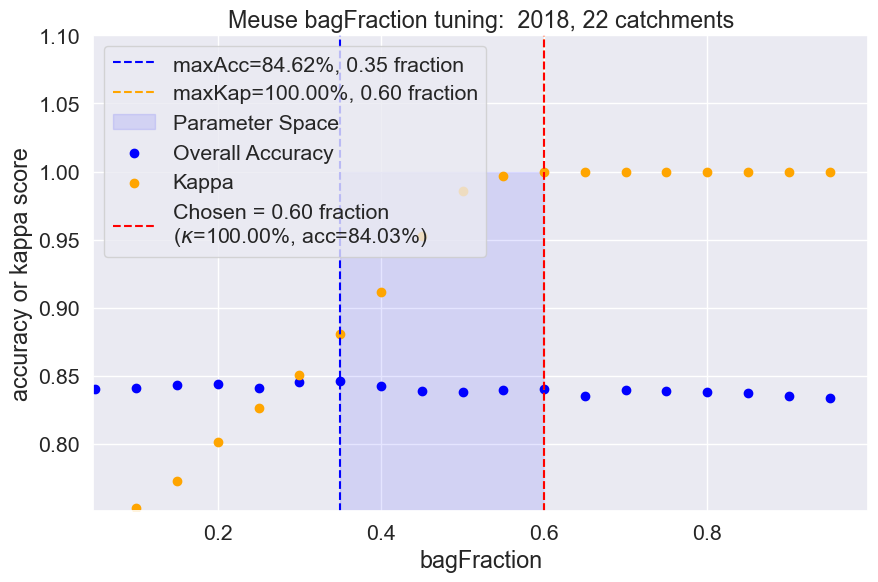

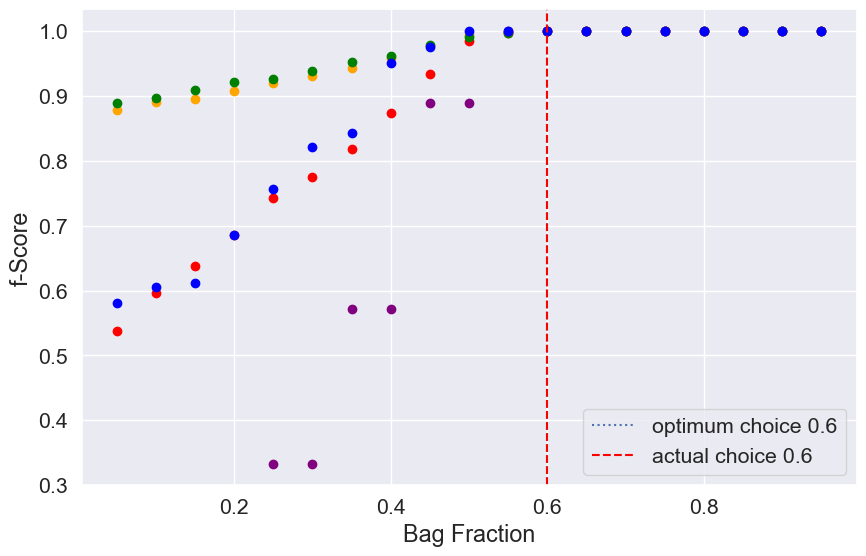

In [24]:
plot_optimum(2018, 'fraction', 'bagFraction', BF, 0.6000000000000001, 22)
plot_fscore(BF, 0.6, 0.6, 'bagFraction', 'Bag Fraction')
# plot_optimum(2012, 'variables', 'variablesPerSplit', VPS, 8, 22)
# plot_fscore(VPS, 8, 8, 'variablesPerSplit', 'Variables Per Split')

In [25]:
MN = [
  {
    "acc1": 0.8016816468541607,
    "fscore": [
      "NaN",
      "NaN",
      0.8487031700288185,
      0.8719965050240279,
      "NaN",
      "NaN"
    ],
    "kappa": 0.6251626029500906,
    "maxNodes": 10,
    "testingAccuracy": 0.7925016160310278
  },
  {
    "acc1": 0.8280661061177153,
    "fscore": [
      "NaN",
      0.3418467583497053,
      0.8670434996313591,
      0.8777292576419214,
      "NaN",
      "NaN"
    ],
    "kappa": 0.6820079707241549,
    "maxNodes": 20,
    "testingAccuracy": 0.8144796380090498
  },
  {
    "acc1": 0.837054218614091,
    "fscore": [
      "NaN",
      0.3992467043314501,
      0.8735177865612649,
      0.8836395450568679,
      0.33333333333333337,
      0.09523809523809523
    ],
    "kappa": 0.7002504436308526,
    "maxNodes": 30,
    "testingAccuracy": 0.8183581124757595
  },
  {
    "acc1": 0.84894172223833,
    "fscore": [
      "NaN",
      0.4722719141323793,
      0.8811119384462646,
      0.8917253521126761,
      0.33333333333333337,
      0.4615384615384615
    ],
    "kappa": 0.7238145651229336,
    "maxNodes": 40,
    "testingAccuracy": 0.8241758241758241
  },
  {
    "acc1": 0.8585097129602783,
    "fscore": [
      "NaN",
      0.5241379310344828,
      0.8865053629333999,
      0.8993821712268315,
      0.33333333333333337,
      0.7096774193548387
    ],
    "kappa": 0.7427108552896076,
    "maxNodes": 50,
    "testingAccuracy": 0.8248222365869424
  },
  {
    "acc1": 0.868367642795013,
    "fscore": [
      "NaN",
      0.5589225589225589,
      0.8930628600050088,
      0.9094922737306843,
      0.4615384615384615,
      0.787878787878788
    ],
    "kappa": 0.7615583254327166,
    "maxNodes": 60,
    "testingAccuracy": 0.8274078862314156
  },
  {
    "acc1": 0.8735865468251667,
    "fscore": [
      "NaN",
      0.5790349417637272,
      0.8967935871743486,
      0.9140832595217006,
      0.4615384615384615,
      0.8235294117647058
    ],
    "kappa": 0.7712504630090913,
    "maxNodes": 70,
    "testingAccuracy": 0.8287007110536523
  },
  {
    "acc1": 0.8814149028703973,
    "fscore": [
      "NaN",
      0.6091205211726385,
      0.9025924993707526,
      0.9194690265486726,
      0.5714285714285715,
      0.9189189189189189
    ],
    "kappa": 0.7863237544851623,
    "maxNodes": 80,
    "testingAccuracy": 0.8319327731092437
  },
  {
    "acc1": 0.8880835024644824,
    "fscore": [
      "NaN",
      0.6302250803858521,
      0.9079445145018916,
      0.9256637168141594,
      0.5714285714285715,
      0.9189189189189189
    ],
    "kappa": 0.7986961733774293,
    "maxNodes": 90,
    "testingAccuracy": 0.8345184227537169
  },
  {
    "acc1": 0.8938822847202088,
    "fscore": [
      "NaN",
      0.653968253968254,
      0.9125379170879676,
      0.9296771340114993,
      0.5714285714285715,
      0.9189189189189189
    ],
    "kappa": 0.8094846701395073,
    "maxNodes": 100,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9008408234270803,
    "fscore": [
      "NaN",
      0.6833073322932917,
      0.9179331306990883,
      0.9335106382978723,
      0.5714285714285715,
      0.9743589743589743
    ],
    "kappa": 0.8224074761345902,
    "maxNodes": 110,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.9066396056828067,
    "fscore": [
      "NaN",
      0.7046153846153846,
      0.9224510551741673,
      0.9376382131800088,
      0.5714285714285715,
      1
    ],
    "kappa": 0.8332635706864765,
    "maxNodes": 120,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9147579008408234,
    "fscore": [
      "NaN",
      0.7417417417417418,
      0.9292103245591617,
      0.941280353200883,
      0.5714285714285715,
      1
    ],
    "kappa": 0.8483626855975911,
    "maxNodes": 130,
    "testingAccuracy": 0.8422753716871364
  },
  {
    "acc1": 0.921716439547695,
    "fscore": [
      "NaN",
      0.778267254038179,
      0.9348383786557208,
      0.9430463576158941,
      0.5714285714285715,
      1
    ],
    "kappa": 0.8611961341864607,
    "maxNodes": 140,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 0.9234560742244129,
    "fscore": [
      "NaN",
      0.7854014598540148,
      0.9362795477903392,
      0.9435127978817299,
      0.6666666666666666,
      1
    ],
    "kappa": 0.8644515506769637,
    "maxNodes": 150,
    "testingAccuracy": 0.8422753716871364
  },
  {
    "acc1": 0.9275152218034213,
    "fscore": [
      "NaN",
      0.8005780346820809,
      0.9397217928902627,
      0.9457910973997355,
      0.6666666666666666,
      1
    ],
    "kappa": 0.8718775873372112,
    "maxNodes": 160,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9304146129312845,
    "fscore": [
      "NaN",
      0.8125894134477826,
      0.9419054996127033,
      0.9476001761338618,
      0.6666666666666666,
      1
    ],
    "kappa": 0.8772163643281321,
    "maxNodes": 170,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9333140040591476,
    "fscore": [
      "NaN",
      0.8226950354609929,
      0.9443437742687032,
      0.9494505494505494,
      0.6666666666666666,
      1
    ],
    "kappa": 0.8825372151071768,
    "maxNodes": 180,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9399826036532328,
    "fscore": [
      "NaN",
      0.8488210818307905,
      0.9500520291363164,
      0.9525899912203688,
      0.6666666666666666,
      1
    ],
    "kappa": 0.8946830303556885,
    "maxNodes": 190,
    "testingAccuracy": 0.8409825468648998
  },
  {
    "acc1": 0.9457813859089591,
    "fscore": [
      "NaN",
      0.8692098092643051,
      0.9550679205851621,
      0.9557211749232792,
      0.6666666666666666,
      1
    ],
    "kappa": 0.9051557079687008,
    "maxNodes": 200,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9492606552623949,
    "fscore": [
      "NaN",
      0.8798920377867746,
      0.9580712788259957,
      0.958005249343832,
      0.6666666666666666,
      1
    ],
    "kappa": 0.9114238992503445,
    "maxNodes": 210,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9544795592925486,
    "fscore": [
      "NaN",
      0.897742363877822,
      0.9621052631578947,
      0.9611183923110528,
      0.7499999999999999,
      1
    ],
    "kappa": 0.9207861683108687,
    "maxNodes": 220,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.959408524209916,
    "fscore": [
      "NaN",
      0.9150326797385622,
      0.966446499339498,
      0.963350785340314,
      0.7499999999999999,
      1
    ],
    "kappa": 0.9295672233636224,
    "maxNodes": 230,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9643374891272832,
    "fscore": [
      "NaN",
      0.926261319534282,
      0.9708222811671088,
      0.9673771204871684,
      0.7499999999999999,
      1
    ],
    "kappa": 0.9382721582227468,
    "maxNodes": 240,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.968686575819078,
    "fscore": [
      "NaN",
      0.9331619537275064,
      0.9747407604360543,
      0.9717759444203213,
      0.7499999999999999,
      1
    ],
    "kappa": 0.9458810292733985,
    "maxNodes": 250,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.973325601623659,
    "fscore": [
      "NaN",
      0.9506953223767383,
      0.9786666666666667,
      0.973489787049109,
      0.7499999999999999,
      1
    ],
    "kappa": 0.954015552582752,
    "maxNodes": 260,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.978834444766599,
    "fscore": [
      "NaN",
      0.9625,
      0.9831685813518567,
      0.9782419495213229,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9635797465219675,
    "maxNodes": 270,
    "testingAccuracy": 0.8377504848093084
  },
  {
    "acc1": 0.9826036532328211,
    "fscore": [
      "NaN",
      0.9727722772277227,
      0.9860888175494917,
      0.9812636165577341,
      0.8235294117647058,
      1
    ],
    "kappa": 0.970106382794312,
    "maxNodes": 280,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.98898231371412,
    "fscore": [
      "NaN",
      0.982843137254902,
      0.9917178733636121,
      0.9877300613496932,
      0.8235294117647058,
      1
    ],
    "kappa": 0.98107274563175,
    "maxNodes": 290,
    "testingAccuracy": 0.8383968972204267
  },
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.991494532199271,
      0.9959967974379503,
      0.992514310876266,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9895432202446514,
    "maxNodes": 300,
    "testingAccuracy": 0.8390433096315449
  },

    
    
    
    
  {
    "acc1": 0.9939112786314874,
    "fscore": [
      "NaN",
      0.991494532199271,
      0.9959967974379503,
      0.992514310876266,
      0.8235294117647058,
      1
    ],
    "kappa": 0.9895432202446514,
    "maxNodes": 300,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9959408524209916,
    "fscore": [
      "NaN",
      0.9951573849878934,
      0.9973304858515749,
      0.9947089947089947,
      0.888888888888889,
      1
    ],
    "kappa": 0.9930328419990662,
    "maxNodes": 310,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 0.9994201217744274,
    "fscore": [
      "NaN",
      0.9987937273823884,
      0.9994669509594882,
      0.9995569339831636,
      1,
      1
    ],
    "kappa": 0.9990046754856825,
    "maxNodes": 320,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 330,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 340,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 350,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 360,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 370,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 380,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 390,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 400,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 410,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 420,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 430,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 440,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 450,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 460,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 470,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 480,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 490,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 500,
    "testingAccuracy": 0.8403361344537815
  }
]



Index(['accuracy', 'kappa', 'maxNodes', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


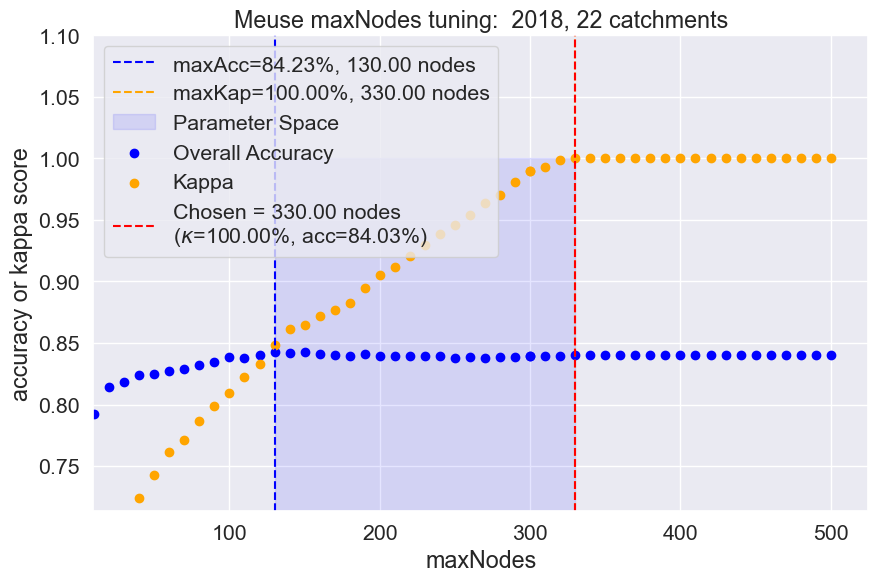

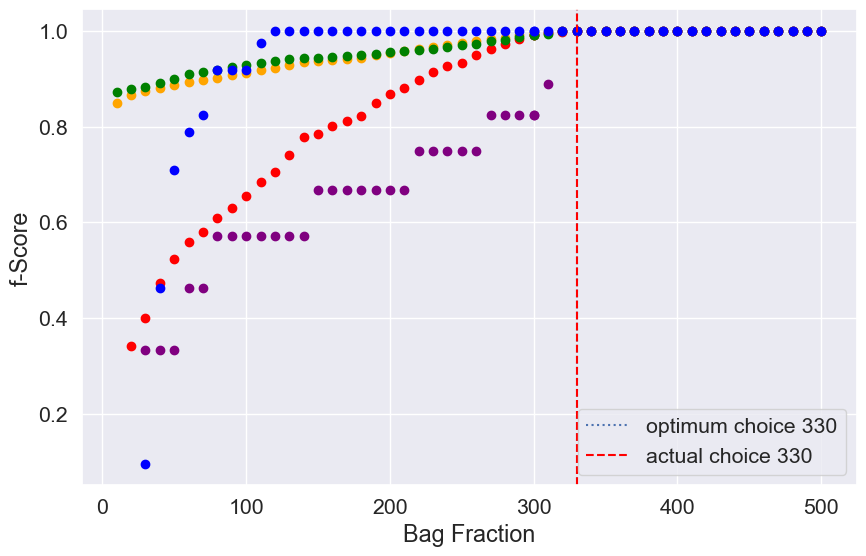

In [26]:
#plotOptimumHP(90, 'nodes', 'maxNodes', MN, 520)

plot_optimum(2018, 'nodes', 'maxNodes', MN, 330, 22)
plot_fscore(MN, 330, 330, 'maxNodes', 'Bag Fraction')
# plot_optimum(2012, 'variables', 'variablesPerSplit', VPS, 8, 22)
# plot_fscore(VPS, 8, 8, 'variablesPerSplit', 'Variables Per Split')

In [27]:
SD = [
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 0,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 0.9994201217744274,
    "fscore": [
      "NaN",
      0.9975845410628019,
      0.9997335464961364,
      0.9995569339831636,
      1,
      1
    ],
    "kappa": 0.9990044656168288,
    "seed": 1,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 2,
    "testingAccuracy": 0.8371040723981901
  },
  {
    "acc1": 0.9994201217744274,
    "fscore": [
      "NaN",
      1,
      0.9994669509594882,
      0.999113475177305,
      1,
      1
    ],
    "kappa": 0.9990047778741548,
    "seed": 3,
    "testingAccuracy": 0.8429217840982547
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 4,
    "testingAccuracy": 0.8396897220426632
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 5,
    "testingAccuracy": 0.8358112475759535
  },
  {
    "acc1": 0.9997100608872137,
    "fscore": [
      "NaN",
      1,
      0.9997334044254865,
      0.9995569339831636,
      1,
      1
    ],
    "kappa": 0.9995024426330351,
    "seed": 6,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 7,
    "testingAccuracy": 0.8403361344537815
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 8,
    "testingAccuracy": 0.8390433096315449
  },
  {
    "acc1": 0.9994201217744274,
    "fscore": [
      "NaN",
      0.9987937273823884,
      0.9994669509594882,
      0.9995569339831636,
      1,
      1
    ],
    "kappa": 0.9990046754856825,
    "seed": 9,
    "testingAccuracy": 0.8416289592760181
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "seed": 10,
    "testingAccuracy": 0.8396897220426632
  }
]


Index(['accuracy', 'kappa', 'seed', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')


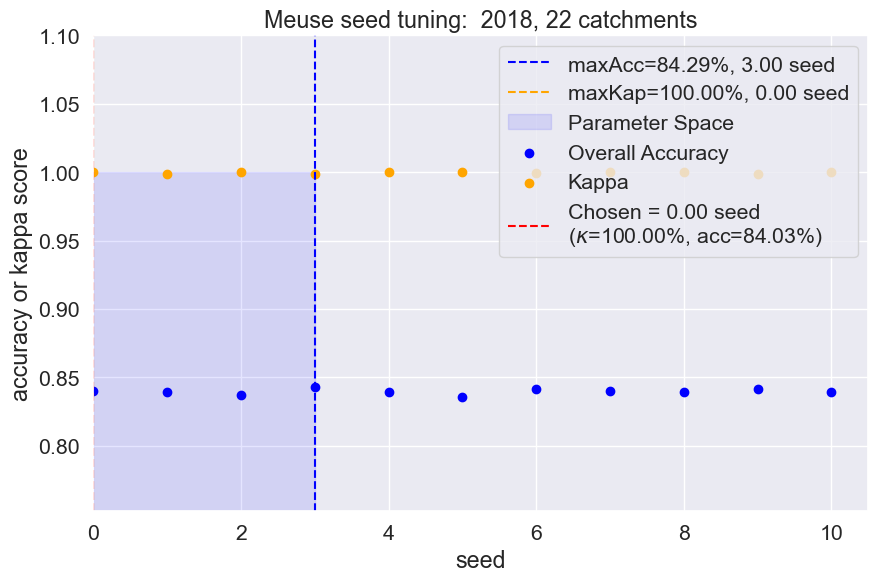

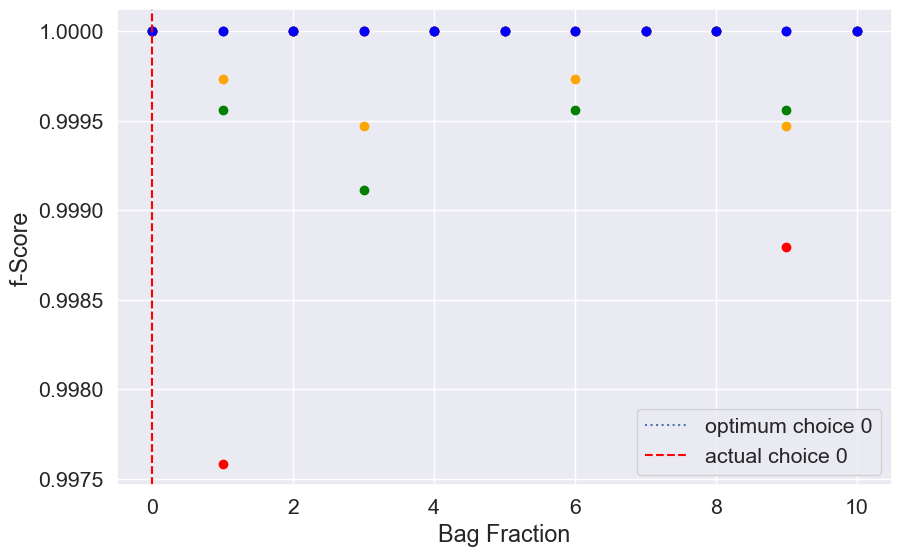

In [28]:
plot_optimum(2018, 'seed', 'seed', SD, 0, 22)
plot_fscore(SD, 0, 0, 'seed', 'Bag Fraction')

### Weighted Sample


In [35]:
NTw = [
  {
    "acc1": 0.9682494279176201,
    "fscore": [
      "NaN",
      0.9425287356321839,
      0.9571078431372548,
      0.9830845771144279,
      0.8685714285714284,
      0.9552238805970149
    ],
    "kappa": 0.9470789187655894,
    "numTrees": 10,
    "testingAccuracy": 0.822028206850235
  },
  {
    "acc1": 0.9742562929061785,
    "fscore": [
      "NaN",
      0.94356005788712,
      0.9656019656019655,
      0.9865604778496765,
      0.9180327868852458,
      0.9661016949152542
    ],
    "kappa": 0.9571348464925069,
    "numTrees": 15,
    "testingAccuracy": 0.8213566151779718
  },
  {
    "acc1": 0.9791189931350115,
    "fscore": [
      "NaN",
      0.9630681818181818,
      0.9727722772277227,
      0.9883055486439413,
      0.9060773480662984,
      0.9745762711864406
    ],
    "kappa": 0.9652471365872723,
    "numTrees": 20,
    "testingAccuracy": 0.8280725319006045
  },
  {
    "acc1": 0.9851258581235698,
    "fscore": [
      "NaN",
      0.9656160458452722,
      0.9802469135802468,
      0.9917685208281366,
      0.9633507853403142,
      0.9831223628691983
    ],
    "kappa": 0.9753030669832577,
    "numTrees": 25,
    "testingAccuracy": 0.8307588985896575
  },
  {
    "acc1": 0.9854118993135011,
    "fscore": [
      "NaN",
      0.9729729729729729,
      0.9813895781637717,
      0.9905331340308918,
      0.9523809523809523,
      0.9873417721518988
    ],
    "kappa": 0.975761220780944,
    "numTrees": 30,
    "testingAccuracy": 0.8347884486232371
  },
  {
    "acc1": 0.9854118993135011,
    "fscore": [
      "NaN",
      0.9684813753581661,
      0.9796421961752004,
      0.9917726252804786,
      0.9578947368421054,
      0.9872881355932204
    ],
    "kappa": 0.9757640839590116,
    "numTrees": 35,
    "testingAccuracy": 0.8307588985896575
  },
  {
    "acc1": 0.9874141876430206,
    "fscore": [
      "NaN",
      0.9772727272727273,
      0.9820877084620137,
      0.9927662758792717,
      0.9523809523809523,
      0.9893842887473461
    ],
    "kappa": 0.9791014225797945,
    "numTrees": 40,
    "testingAccuracy": 0.8314304902619207
  },
  {
    "acc1": 0.9888443935926774,
    "fscore": [
      "NaN",
      0.9801136363636364,
      0.9833230389129092,
      0.9935097353969048,
      0.96875,
      0.9893842887473461
    ],
    "kappa": 0.9814905796004587,
    "numTrees": 45,
    "testingAccuracy": 0.8307588985896575
  },
  {
    "acc1": 0.98941647597254,
    "fscore": [
      "NaN",
      0.9815078236130867,
      0.9857936998147004,
      0.9935097353969048,
      0.96875,
      0.9872881355932204
    ],
    "kappa": 0.9824400619414352,
    "numTrees": 50,
    "testingAccuracy": 0.8341168569509738
  },
  {
    "acc1": 0.9882723112128147,
    "fscore": [
      "NaN",
      0.9756795422031473,
      0.9851851851851853,
      0.9927662758792717,
      0.9578947368421054,
      0.9915611814345991
    ],
    "kappa": 0.9805267409516921,
    "numTrees": 55,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9891304347826086,
    "fscore": [
      "NaN",
      0.9800000000000001,
      0.987012987012987,
      0.9927734861699476,
      0.9633507853403142,
      0.9893842887473461
    ],
    "kappa": 0.9819385913738174,
    "numTrees": 60,
    "testingAccuracy": 0.8354600402955004
  },
  {
    "acc1": 0.9877002288329519,
    "fscore": [
      "NaN",
      0.9772079772079773,
      0.985166872682324,
      0.9927698828222388,
      0.9578947368421054,
      0.980891719745223
    ],
    "kappa": 0.9795692427458499,
    "numTrees": 65,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9891304347826086,
    "fscore": [
      "NaN",
      0.9786628733997156,
      0.9864029666254635,
      0.9935162094763094,
      0.9578947368421054,
      0.9893842887473461
    ],
    "kappa": 0.981948940481289,
    "numTrees": 70,
    "testingAccuracy": 0.8341168569509738
  },
  {
    "acc1": 0.9908466819221968,
    "fscore": [
      "NaN",
      0.9814550641940086,
      0.9876084262701362,
      0.9940179461615155,
      0.9740932642487047,
      0.9957627118644067
    ],
    "kappa": 0.9847978973178627,
    "numTrees": 75,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9914187643020596,
    "fscore": [
      "NaN",
      0.982905982905983,
      0.9876237623762376,
      0.9947591714499625,
      0.96875,
      0.9978947368421053
    ],
    "kappa": 0.9857623496141391,
    "numTrees": 80,
    "testingAccuracy": 0.832102081934184
  },
  {
    "acc1": 0.9925629290617849,
    "fscore": [
      "NaN",
      0.9857954545454546,
      0.9888475836431226,
      0.9952582979785376,
      0.9740932642487047,
      1
    ],
    "kappa": 0.987662451536683,
    "numTrees": 85,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9922768878718535,
    "fscore": [
      "NaN",
      0.984352773826458,
      0.988235294117647,
      0.9952582979785376,
      0.9740932642487047,
      1
    ],
    "kappa": 0.9871871426195962,
    "numTrees": 90,
    "testingAccuracy": 0.8314304902619207
  },
  {
    "acc1": 0.9914187643020596,
    "fscore": [
      "NaN",
      0.9814550641940086,
      0.9876237623762376,
      0.9947617859815415,
      0.96875,
      1
    ],
    "kappa": 0.9857557712350785,
    "numTrees": 95,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9914187643020596,
    "fscore": [
      "NaN",
      0.982905982905983,
      0.9888751545117429,
      0.9947617859815415,
      0.9578947368421054,
      0.9978858350951374
    ],
    "kappa": 0.9857527991103923,
    "numTrees": 100,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9919908466819222,
    "fscore": [
      "NaN",
      0.9843081312410842,
      0.9876237623762376,
      0.9950099800399201,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9867090616750699,
    "numTrees": 105,
    "testingAccuracy": 0.8347884486232371
  },
  {
    "acc1": 0.9928489702517163,
    "fscore": [
      "NaN",
      0.9857549857549858,
      0.9888613861386139,
      0.9960079840319361,
      0.96875,
      1
    ],
    "kappa": 0.9881324559135674,
    "numTrees": 110,
    "testingAccuracy": 0.8354600402955004
  },
  {
    "acc1": 0.9925629290617849,
    "fscore": [
      "NaN",
      0.9843081312410842,
      0.9894736842105263,
      0.9957595410326765,
      0.96875,
      0.9978947368421053
    ],
    "kappa": 0.9876559590186964,
    "numTrees": 115,
    "testingAccuracy": 0.8341168569509738
  },
  {
    "acc1": 0.9928489702517163,
    "fscore": [
      "NaN",
      0.9857549857549858,
      0.9907120743034057,
      0.9957616554475194,
      0.9633507853403142,
      0.9978858350951374
    ],
    "kappa": 0.9881246401895057,
    "numTrees": 120,
    "testingAccuracy": 0.8354600402955004
  },
  {
    "acc1": 0.9939931350114416,
    "fscore": [
      "NaN",
      0.9871977240398292,
      0.9907120743034057,
      0.9967556775642624,
      0.9740932642487047,
      1
    ],
    "kappa": 0.9900344442596859,
    "numTrees": 125,
    "testingAccuracy": 0.8368032236400269
  },
  {
    "acc1": 0.993421052631579,
    "fscore": [
      "NaN",
      0.9871977240398292,
      0.9913258983890955,
      0.9960099750623441,
      0.96875,
      0.9978858350951374
    ],
    "kappa": 0.9890781578369733,
    "numTrees": 130,
    "testingAccuracy": 0.8368032236400269
  },
  {
    "acc1": 0.9939931350114416,
    "fscore": [
      "NaN",
      0.9886363636363636,
      0.9919504643962848,
      0.9962565510356876,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9900342846345462,
    "numTrees": 135,
    "testingAccuracy": 0.8354600402955004
  },
  {
    "acc1": 0.9945652173913043,
    "fscore": [
      "NaN",
      0.9900709219858156,
      0.9919504643962848,
      0.9967540574282148,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9909877310543788,
    "numTrees": 140,
    "testingAccuracy": 0.8368032236400269
  },
  {
    "acc1": 0.9948512585812357,
    "fscore": [
      "NaN",
      0.9900709219858156,
      0.9919504643962848,
      0.9970029970029971,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.9914642590943525,
    "numTrees": 145,
    "testingAccuracy": 0.8368032236400269
  },
  {
    "acc1": 0.995137299771167,
    "fscore": [
      "NaN",
      0.9915014164305949,
      0.9925650557620818,
      0.9970029970029971,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.9919389622431147,
    "numTrees": 150,
    "testingAccuracy": 0.8361316319677636
  },
  {
    "acc1": 0.9945652173913043,
    "fscore": [
      "NaN",
      0.9886363636363636,
      0.9913473423980222,
      0.9972520609542843,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9909900842638181,
    "numTrees": 155,
    "testingAccuracy": 0.8347884486232371
  },
  {
    "acc1": 0.995137299771167,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9970029970029971,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9919364204827291,
    "numTrees": 160,
    "testingAccuracy": 0.8361316319677636
  },
  {
    "acc1": 0.995137299771167,
    "fscore": [
      "NaN",
      0.9900426742532006,
      0.992583436341162,
      0.9972520609542843,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.9919387763683204,
    "numTrees": 165,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9939931350114416,
    "fscore": [
      "NaN",
      0.9886039886039886,
      0.9919703520691785,
      0.9965052421367948,
      0.96875,
      0.9978858350951374
    ],
    "kappa": 0.99003370831818,
    "numTrees": 170,
    "testingAccuracy": 0.8361316319677636
  },
  {
    "acc1": 0.994279176201373,
    "fscore": [
      "NaN",
      0.9886039886039886,
      0.9919703520691785,
      0.9967540574282148,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9905107385948699,
    "numTrees": 175,
    "testingAccuracy": 0.8347884486232371
  },
  {
    "acc1": 0.9945652173913043,
    "fscore": [
      "NaN",
      0.9900426742532006,
      0.992583436341162,
      0.9967540574282148,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9909857558549025,
    "numTrees": 180,
    "testingAccuracy": 0.8347884486232371
  },
  {
    "acc1": 0.9945652173913043,
    "fscore": [
      "NaN",
      0.9900426742532006,
      0.9925925925925926,
      0.9970029970029971,
      0.96875,
      0.9978858350951374
    ],
    "kappa": 0.9909863430015108,
    "numTrees": 185,
    "testingAccuracy": 0.8354600402955004
  },
  {
    "acc1": 0.995137299771167,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9972534332084895,
      0.96875,
      0.9978858350951374
    ],
    "kappa": 0.9919343434494224,
    "numTrees": 190,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9954233409610984,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9975024975024975,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9924107486896276,
    "numTrees": 195,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9954233409610984,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9975024975024975,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9924107486896276,
    "numTrees": 200,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.995137299771167,
    "fscore": [
      "NaN",
      0.9900426742532006,
      0.993205682520074,
      0.9975024975024975,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9919359248496364,
    "numTrees": 205,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9957093821510298,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9977516862353235,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9928869086293302,
    "numTrees": 210,
    "testingAccuracy": 0.832102081934184
  },
  {
    "acc1": 0.9957093821510298,
    "fscore": [
      "NaN",
      0.9914772727272727,
      0.9938195302843017,
      0.9977516862353235,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9928869086293302,
    "numTrees": 215,
    "testingAccuracy": 0.8307588985896575
  },
  {
    "acc1": 0.9962814645308925,
    "fscore": [
      "NaN",
      0.9929078014184397,
      0.99443413729128,
      0.9980009995002499,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.9938372860735657,
    "numTrees": 220,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9965675057208238,
    "fscore": [
      "NaN",
      0.9929078014184397,
      0.9950556242274413,
      0.9982504373906523,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.9943122580113347,
    "numTrees": 225,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9968535469107551,
    "fscore": [
      "NaN",
      0.9943342776203966,
      0.9956709956709956,
      0.9982504373906523,
      0.9846153846153847,
      0.9978858350951374
    ],
    "kappa": 0.994786556702093,
    "numTrees": 230,
    "testingAccuracy": 0.8341168569509738
  },
  {
    "acc1": 0.9965675057208238,
    "fscore": [
      "NaN",
      0.9943342776203966,
      0.9956709956709956,
      0.9980009995002499,
      0.979381443298969,
      0.9978858350951374
    ],
    "kappa": 0.9943111435114123,
    "numTrees": 235,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9965675057208238,
    "fscore": [
      "NaN",
      0.9957567185289957,
      0.9962871287128713,
      0.9977516862353235,
      0.9740932642487047,
      0.9978858350951374
    ],
    "kappa": 0.9943100285746369,
    "numTrees": 240,
    "testingAccuracy": 0.8334452652787105
  },
  {
    "acc1": 0.9968535469107551,
    "fscore": [
      "NaN",
      0.9957567185289957,
      0.9962871287128713,
      0.9980009995002499,
      0.9740932642487047,
      1
    ],
    "kappa": 0.9947854376267503,
    "numTrees": 245,
    "testingAccuracy": 0.8327736736064473
  },
  {
    "acc1": 0.9965675057208238,
    "fscore": [
      "NaN",
      0.9957567185289957,
      0.9956656346749225,
      0.9977516862353235,
      0.9740932642487047,
      1
    ],
    "kappa": 0.9943104692004915,
    "numTrees": 250,
    "testingAccuracy": 0.8334452652787105
  }
]


# 1990 Calibrated Weighted


12580.100706872665


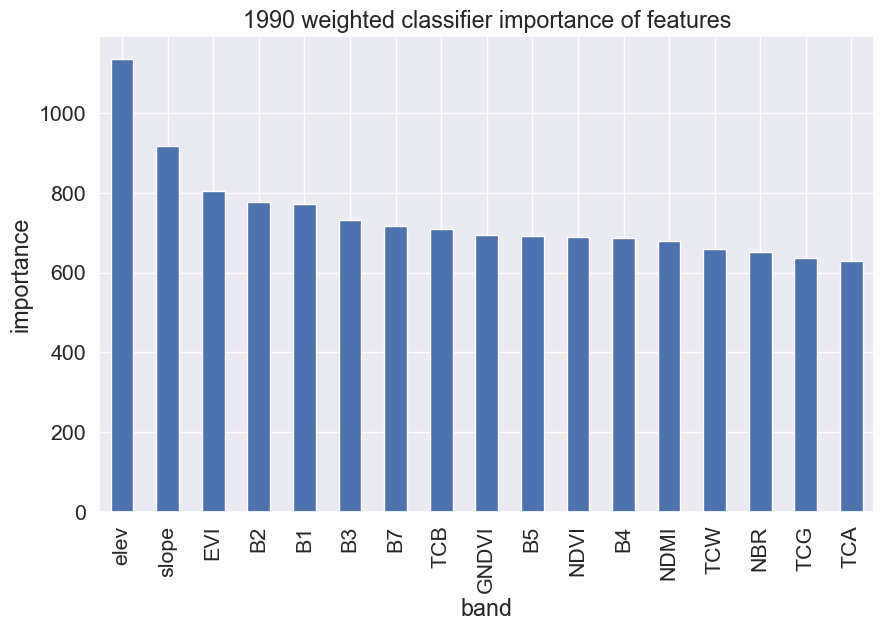

In [30]:
plt.figure(figsize=(10,6.18))

explain_1990 = {"importance": {
    "B1": 771.0546634841014,
    "B2": 776.2071388710132,
    "B3": 732.8087804782822,
    "B4": 686.4376002442252,
    "B5": 692.3832144073356,
    "B7": 715.6173436379994,
    "EVI": 804.3760211549793,
    "GNDVI": 693.6965280942198,
    "NBR": 651.0262625517255,
    # "NDFI": 468.5524970786007,
    "NDMI": 678.1230321182093,
    # "NDSI": 750.1731029816998,
    "NDVI": 687.9571976728037,
    "TCA": 629.0625103837243,
    "TCB": 710.347223392971,
    "TCG": 637.2543082615952,
    "TCW": 660.2576565266497,
    "elev": 1136.7005037930876,
    "slope": 916.790721799742
  },
  "numberOfTrees": 190,
  "outOfBagErrorEstimate": 0.1455949656750572,}
plt.title('1990 weighted classifier importance of features')
importance_1990 = pd.DataFrame(explain_1990['importance'], index=[0])
imp_series = importance_1990.iloc[0, :].sort_values(ascending=False)
imp_series.plot(kind='bar', )
plt.xlabel('band')
plt.ylabel('importance')
print(imp_series.values.sum());

In [31]:
EMw90 = [
  [
    85,
    47,
    7,
    0,
    6
  ],
  [
    18,
    268,
    44,
    2,
    6
  ],
  [
    4,
    33,
    799,
    0,
    6
  ],
  [
    0,
    13,
    27,
    11,
    0
  ],
  [
    9,
    9,
    8,
    0,
    87
  ]
]

CMw90 = [
  [
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    355,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    808,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    1997,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    99,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    237
  ]
]

kappaw90 = 1

fscorew90 = [
  "NaN",
  1,
  1,
  1,
  1,
  1
]

consAccw90 = [
  [
    0,
    1,
    1,
    1,
    1,
    1
  ]
]

prodAccw90=[
  [
    0
  ],
  [
    1
  ],
  [
    1
  ],
  [
    1
  ],
  [
    1
  ],
  [
    1
  ]
]

accw90 = 0.8394895903290799

n_trainw90 = 3496

n_testw90 = 1489

trainedAreaw90 = {
  "1": 93.13219868657467,
  "2": 616.996084301691,
  "3": 859.204607287953,
  "4": 2.005246516784668,
  "5": 18.19555246907815
}

classAreaw90 = {
  "1": 91.92946290020704,
  "2": 571.2616374532957,
  "3": 888.2510117113166,
  "4": 2.2294546474609374,
  "5": 31.300552294315352
}

masked = sum(trainedAreaw90.values())- sum(classAreaw90.values())

classAreaw90['6'] = masked

dict_tuned_1990 = {
    'errMat':np.array(EMw90),
    'conMat':np.array(CMw90)[1:][:, 1:],
    'kappa':kappaw90,
    'fscore':np.array(fscorew90[1:]),
    'consAcc':np.array(consAccw90[0][1:]),
    'prodAcc':np.array(prodAccw90[1:]),
    'acc':accw90,
    'nTrain':n_trainw90,
    'nTest':n_testw90, 
    'trainedArea':trainedAreaw90,
    'totalArea':sum(trainedAreaw90.values()),
    'classArea':classAreaw90,
    'maskedArea':sum(trainedAreaw90.values())- sum(classAreaw90.values()),
}


dict_tuned_1990

{'errMat': array([[ 85,  47,   7,   0,   6],
        [ 18, 268,  44,   2,   6],
        [  4,  33, 799,   0,   6],
        [  0,  13,  27,  11,   0],
        [  9,   9,   8,   0,  87]]),
 'conMat': array([[ 355,    0,    0,    0,    0],
        [   0,  808,    0,    0,    0],
        [   0,    0, 1997,    0,    0],
        [   0,    0,    0,   99,    0],
        [   0,    0,    0,    0,  237]]),
 'kappa': 1,
 'fscore': array([1, 1, 1, 1, 1]),
 'consAcc': array([1, 1, 1, 1, 1]),
 'prodAcc': array([[1],
        [1],
        [1],
        [1],
        [1]]),
 'acc': 0.8394895903290799,
 'nTrain': 3496,
 'nTest': 1489,
 'trainedArea': {'1': 93.13219868657467,
  '2': 616.996084301691,
  '3': 859.204607287953,
  '4': 2.005246516784668,
  '5': 18.19555246907815},
 'totalArea': 1589.5336892620815,
 'classArea': {'1': 91.92946290020704,
  '2': 571.2616374532957,
  '3': 888.2510117113166,
  '4': 2.2294546474609374,
  '5': 31.300552294315352,
  '6': 4.561570255485776},
 'maskedArea': 0.0}

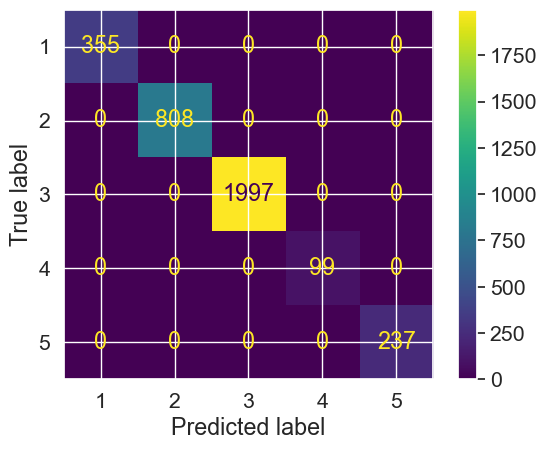

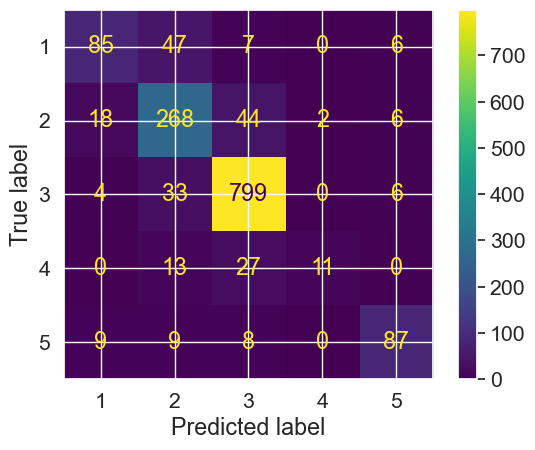

producers accuracy
 [[1]
 [1]
 [1]
 [1]
 [1]]
consumers accuracy
 [1 1 1 1 1]


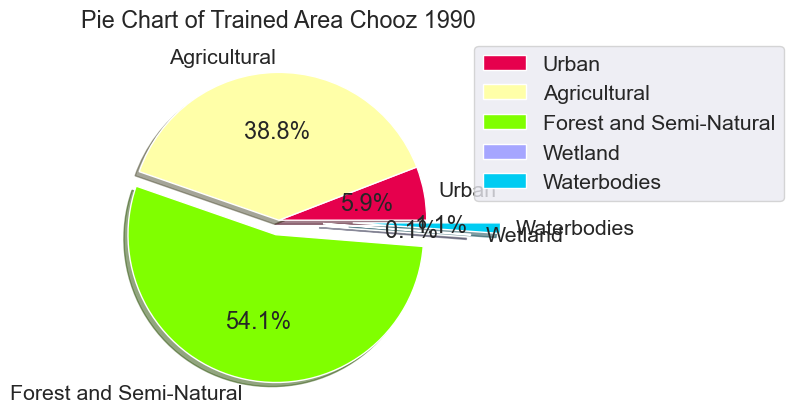

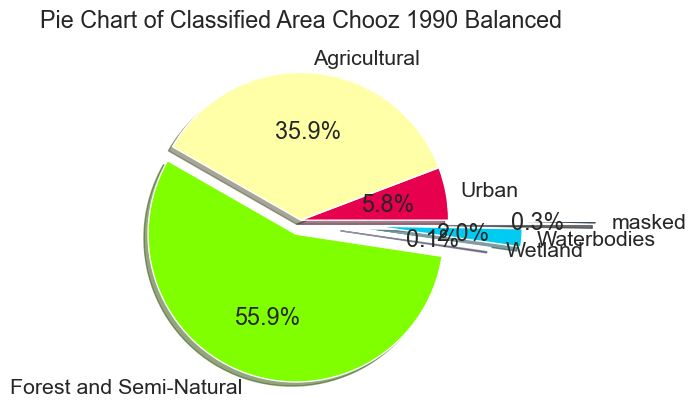

In [32]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dict_tuned_1990['conMat'], display_labels=[1,2,3,4,5])
cm_display.plot()
plt.show()

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dict_tuned_1990['errMat'], display_labels=[1,2,3,4,5])
cm_display.plot()
plt.show()

print('producers accuracy\n', dict_tuned_1990['prodAcc'])
print('consumers accuracy\n', dict_tuned_1990['consAcc'])



plt.title('Pie Chart of Trained Area Chooz 1990')
explode = (0, 0, 0.1, 0.3, 0.5) 
plt.pie(dict_tuned_1990['trainedArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2'], autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.title('Pie Chart of Classified Area Chooz 1990 Balanced')
explode = (0, 0, 0.1, 0.3, 0.5, 1) 
plt.pie(dict_tuned_1990['classArea'].values(), explode=explode, labels=['Urban', 'Agricultural', 'Forest and Semi-Natural', 'Wetland', 'Waterbodies', 'masked'], colors=['#E6004D', '#FFFFA8', '#80FF00', '#A6A6FF', '#00CCF2', '#0a1a29'], autopct='%1.1f%%', shadow=True)
plt.show()


Error matrix for 2018 mixed with 1990 classifier

## 2018 weighted sample hyperparameter tuning 


In [36]:
NTw18 = [
  {
    "acc1": 0.9711701526286037,
    "fscore": [
      "NaN",
      0.9337175792507204,
      0.9544626593806922,
      0.98636926889715,
      0.9393939393939394,
      0.9681274900398407
    ],
    "kappa": 0.9523655087507966,
    "numTrees": 10,
    "testingAccuracy": 0.8416320885200553
  },
  {
    "acc1": 0.9790842283776144,
    "fscore": [
      "NaN",
      0.9489051094890512,
      0.9671132764920828,
      0.9905847373637264,
      0.95,
      0.9785575048732943
    ],
    "kappa": 0.9654517217858872,
    "numTrees": 15,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9838892029395139,
    "fscore": [
      "NaN",
      0.9552669552669553,
      0.9761175750153092,
      0.9935515873015872,
      0.970873786407767,
      0.9765625
    ],
    "kappa": 0.9734313207031123,
    "numTrees": 20,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 0.9850197851893725,
    "fscore": [
      "NaN",
      0.9620991253644314,
      0.97796817625459,
      0.9933118652464702,
      0.9803921568627451,
      0.9747572815533979
    ],
    "kappa": 0.975266560406553,
    "numTrees": 25,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9875635952515546,
    "fscore": [
      "NaN",
      0.9695210449927433,
      0.9822846670739157,
      0.994297049342921,
      0.9803921568627451,
      0.9785575048732943
    ],
    "kappa": 0.97948024133573,
    "numTrees": 30,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 0.9881288863764839,
    "fscore": [
      "NaN",
      0.9739884393063584,
      0.9822846670739157,
      0.9942913874410524,
      0.9853658536585366,
      0.9785575048732943
    ],
    "kappa": 0.9804307123873369,
    "numTrees": 35,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9892594686263426,
    "fscore": [
      "NaN",
      0.9756097560975608,
      0.9840490797546012,
      0.994047619047619,
      0.9902912621359222,
      0.9863013698630138
    ],
    "kappa": 0.9822905872213344,
    "numTrees": 40,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.9903900508762012,
    "fscore": [
      "NaN",
      0.9813486370157819,
      0.9846719803801349,
      0.9950396825396826,
      0.9855072463768114,
      0.9862475442043221
    ],
    "kappa": 0.9841538822277198,
    "numTrees": 45,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9903900508762012,
    "fscore": [
      "NaN",
      0.9770114942528736,
      0.9858982219497241,
      0.9947903745968742,
      0.9951690821256038,
      0.9863013698630138
    ],
    "kappa": 0.9841577409200896,
    "numTrees": 50,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9892594686263426,
    "fscore": [
      "NaN",
      0.9740634005763689,
      0.9840490797546012,
      0.9945463559742193,
      0.9951690821256038,
      0.9823874755381604
    ],
    "kappa": 0.9822834204684452,
    "numTrees": 55,
    "testingAccuracy": 0.8520055325034578
  },
  {
    "acc1": 0.990672696438666,
    "fscore": [
      "NaN",
      0.9755395683453237,
      0.9871402327005511,
      0.995286529397172,
      0.9951690821256038,
      0.984313725490196
    ],
    "kappa": 0.9846216097244472,
    "numTrees": 60,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9901074053137365,
    "fscore": [
      "NaN",
      0.9770114942528736,
      0.9858809085328422,
      0.9945463559742193,
      0.9951690821256038,
      0.984313725490196
    ],
    "kappa": 0.9836828955290237,
    "numTrees": 65,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9909553420011306,
    "fscore": [
      "NaN",
      0.9784791965566714,
      0.9871244635193134,
      0.9950396825396826,
      0.9951690821256038,
      0.9862475442043221
    ],
    "kappa": 0.9850860068025598,
    "numTrees": 70,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9909553420011306,
    "fscore": [
      "NaN",
      0.9770114942528736,
      0.9877149877149878,
      0.9947955390334573,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9850791588997883,
    "numTrees": 75,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9918032786885246,
    "fscore": [
      "NaN",
      0.9784791965566714,
      0.988957055214724,
      0.9955357142857143,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9864851924195791,
    "numTrees": 80,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9915206331260599,
    "fscore": [
      "NaN",
      0.9798850574712644,
      0.9883364027010437,
      0.9950421417947446,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9860139104534489,
    "numTrees": 85,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.9912379875635953,
    "fscore": [
      "NaN",
      0.9784791965566714,
      0.9871086556169428,
      0.9952888668484999,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9855508661470435,
    "numTrees": 90,
    "testingAccuracy": 0.8533886583679114
  },
  {
    "acc1": 0.9923685698134539,
    "fscore": [
      "NaN",
      0.9814020028612305,
      0.988957055214724,
      0.9960297766749381,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.987422744995187,
    "numTrees": 95,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9915206331260599,
    "fscore": [
      "NaN",
      0.9784791965566714,
      0.9871244635193134,
      0.9957826841974696,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9860213612144002,
    "numTrees": 100,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9918032786885246,
    "fscore": [
      "NaN",
      0.9784791965566714,
      0.9877450980392156,
      0.9960297766749381,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9864894385944446,
    "numTrees": 105,
    "testingAccuracy": 0.8520055325034578
  },
  {
    "acc1": 0.9920859242509893,
    "fscore": [
      "NaN",
      0.9769452449567723,
      0.9896024464831804,
      0.9962769918093819,
      0.9951690821256038,
      0.9863013698630138
    ],
    "kappa": 0.9869559314999427,
    "numTrees": 110,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9920859242509893,
    "fscore": [
      "NaN",
      0.9828080229226361,
      0.9889434889434889,
      0.9955357142857143,
      0.9951690821256038,
      0.9863013698630138
    ],
    "kappa": 0.9869529852303114,
    "numTrees": 115,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9920859242509893,
    "fscore": [
      "NaN",
      0.9812949640287769,
      0.9883649724433557,
      0.9957826841974696,
      0.9951690821256038,
      0.988235294117647
    ],
    "kappa": 0.9869516688571067,
    "numTrees": 120,
    "testingAccuracy": 0.8520055325034578
  },
  {
    "acc1": 0.9926512153759186,
    "fscore": [
      "NaN",
      0.9813486370157819,
      0.9901840490797545,
      0.9960297766749381,
      0.9951690821256038,
      0.98828125
    ],
    "kappa": 0.9878888722266014,
    "numTrees": 125,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9842180774748924,
      0.9907918968692448,
      0.9957826841974696,
      1,
      0.990215264187867
    ],
    "kappa": 0.9888189649905295,
    "numTrees": 130,
    "testingAccuracy": 0.8533886583679114
  },
  {
    "acc1": 0.9934991520633126,
    "fscore": [
      "NaN",
      0.9828080229226361,
      0.9914110429447853,
      0.9962769918093819,
      1,
      0.990215264187867
    ],
    "kappa": 0.9892888639672296,
    "numTrees": 135,
    "testingAccuracy": 0.851313969571231
  },
  {
    "acc1": 0.9943470887507067,
    "fscore": [
      "NaN",
      0.9842632331902718,
      0.9920294297976702,
      0.9970193740685543,
      1,
      0.9921875
    ],
    "kappa": 0.9906916121638372,
    "numTrees": 140,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9946297343131713,
    "fscore": [
      "NaN",
      0.9885714285714285,
      0.9926380368098159,
      0.996524329692155,
      1,
      0.9921568627450981
    ],
    "kappa": 0.9911534914374872,
    "numTrees": 145,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.994912379875636,
    "fscore": [
      "NaN",
      0.9857142857142857,
      0.9938650306748467,
      0.9972670807453416,
      1,
      0.9902534113060428
    ],
    "kappa": 0.9916248967972768,
    "numTrees": 150,
    "testingAccuracy": 0.851313969571231
  },
  {
    "acc1": 0.9937817976257772,
    "fscore": [
      "NaN",
      0.9813486370157819,
      0.9932556713672593,
      0.9970208540218471,
      0.9951690821256038,
      0.98635477582846
    ],
    "kappa": 0.9897560973041779,
    "numTrees": 155,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9813486370157819,
      0.9920294297976702,
      0.9962769918093819,
      1,
      0.9863013698630138
    ],
    "kappa": 0.9888224767839187,
    "numTrees": 160,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9827586206896551,
      0.9920294297976702,
      0.9962769918093819,
      0.9951690821256038,
      0.98635477582846
    ],
    "kappa": 0.988822392915162,
    "numTrees": 165,
    "testingAccuracy": 0.851313969571231
  },
  {
    "acc1": 0.9940644431882419,
    "fscore": [
      "NaN",
      0.9856733524355301,
      0.9926380368098159,
      0.9962769918093819,
      1,
      0.990215264187867
    ],
    "kappa": 0.9902202671005141,
    "numTrees": 170,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9937817976257772,
    "fscore": [
      "NaN",
      0.9856733524355301,
      0.9926380368098159,
      0.9960278053624627,
      1,
      0.98828125
    ],
    "kappa": 0.9897569304164526,
    "numTrees": 175,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9946297343131713,
    "fscore": [
      "NaN",
      0.9871244635193134,
      0.9950980392156864,
      0.9965226030799802,
      1,
      0.9863013698630138
    ],
    "kappa": 0.9911563789067099,
    "numTrees": 180,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9842180774748924,
      0.9926380368098159,
      0.9957805907172995,
      1,
      0.984375
    ],
    "kappa": 0.9888233021619051,
    "numTrees": 185,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9940644431882419,
    "fscore": [
      "NaN",
      0.985632183908046,
      0.9944886711573792,
      0.9962751427861932,
      1,
      0.984375
    ],
    "kappa": 0.9902228603048628,
    "numTrees": 190,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9940644431882419,
    "fscore": [
      "NaN",
      0.9842180774748924,
      0.9932639314145745,
      0.9967701863354037,
      1,
      0.98635477582846
    ],
    "kappa": 0.9902272495293696,
    "numTrees": 195,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9946297343131713,
    "fscore": [
      "NaN",
      0.9856733524355301,
      0.9938800489596084,
      0.9972657220979368,
      1,
      0.98635477582846
    ],
    "kappa": 0.9911613033862692,
    "numTrees": 200,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9954776710005653,
    "fscore": [
      "NaN",
      0.988538681948424,
      0.9944886711573792,
      0.9975149105367793,
      1,
      0.9902534113060428
    ],
    "kappa": 0.9925557193387309,
    "numTrees": 205,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9954776710005653,
    "fscore": [
      "NaN",
      0.988538681948424,
      0.9951040391676866,
      0.9975149105367793,
      0.9951690821256038,
      0.9902534113060428
    ],
    "kappa": 0.9925550212704284,
    "numTrees": 210,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9954776710005653,
    "fscore": [
      "NaN",
      0.988538681948424,
      0.9951040391676866,
      0.9975149105367793,
      0.9951690821256038,
      0.9902534113060428
    ],
    "kappa": 0.9925550212704284,
    "numTrees": 215,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9960429621254946,
    "fscore": [
      "NaN",
      0.9899569583931133,
      0.9963325183374084,
      0.9977628635346756,
      0.9951690821256038,
      0.9902534113060428
    ],
    "kappa": 0.9934862664137026,
    "numTrees": 220,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9954776710005653,
    "fscore": [
      "NaN",
      0.9885057471264369,
      0.9951100244498778,
      0.9975149105367793,
      0.9951690821256038,
      0.9902534113060428
    ],
    "kappa": 0.9925541085910023,
    "numTrees": 225,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9951950254381006,
    "fscore": [
      "NaN",
      0.9899569583931133,
      0.9944886711573792,
      0.9970193740685543,
      0.9951690821256038,
      0.9902534113060428
    ],
    "kappa": 0.9920867419180065,
    "numTrees": 230,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.99576031656303,
    "fscore": [
      "NaN",
      0.9899856938483547,
      0.9950920245398772,
      0.9975161450571286,
      0.9951690821256038,
      0.9922178988326849
    ],
    "kappa": 0.9930190847200564,
    "numTrees": 235,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9951950254381006,
    "fscore": [
      "NaN",
      0.988538681948424,
      0.9938725490196078,
      0.9970193740685543,
      0.9951690821256038,
      0.9941520467836258
    ],
    "kappa": 0.9920872270536688,
    "numTrees": 240,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9960429621254946,
    "fscore": [
      "NaN",
      0.9899856938483547,
      0.9957134109001837,
      0.9977639751552795,
      0.9951690821256038,
      0.9921875
    ],
    "kappa": 0.993484539922912,
    "numTrees": 245,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9954776710005653,
    "fscore": [
      "NaN",
      0.9899856938483547,
      0.9944886711573792,
      0.9972670807453416,
      0.9951690821256038,
      0.9921875
    ],
    "kappa": 0.9925537599118994,
    "numTrees": 250,
    "testingAccuracy": 0.8554633471645919
  }
]


In [37]:
plotOptimum(18, 'trees', 'numTrees', NTw18, 90)
plotOptimumHP(90, 'trees', 'numTrees', NTw, 90)

NameError: name 'plotOptimum' is not defined

In [89]:
VPSw18 = [
  {
    "acc1": 0.9872809496890899,
    "fscore": [
      "NaN",
      0.9811866859623734,
      0.9857761286332715,
      0.9906172839506172,
      0.9753694581280787,
      0.9786407766990292
    ],
    "kappa": 0.9789613589897012,
    "testingAccuracy": 0.8443983402489627,
    "variablesPerSplit": 1
  },
  {
    "acc1": 0.9951950254381006,
    "fscore": [
      "NaN",
      0.9870503597122302,
      0.9957081545064378,
      0.9970208540218471,
      1,
      0.9883268482490272
    ],
    "kappa": 0.992084613280994,
    "testingAccuracy": 0.8499308437067773,
    "variablesPerSplit": 2
  },
  {
    "acc1": 0.9946297343131713,
    "fscore": [
      "NaN",
      0.9856733524355301,
      0.9957028852056475,
      0.9967733929014644,
      1,
      0.984375
    ],
    "kappa": 0.9911523235778823,
    "testingAccuracy": 0.8554633471645919,
    "variablesPerSplit": 3
  },
  {
    "acc1": 0.9940644431882419,
    "fscore": [
      "NaN",
      0.985632183908046,
      0.9944886711573792,
      0.9962751427861932,
      1,
      0.984375
    ],
    "kappa": 0.9902228603048628,
    "testingAccuracy": 0.8554633471645919,
    "variablesPerSplit": 4
  },
  {
    "acc1": 0.9943470887507067,
    "fscore": [
      "NaN",
      0.9842180774748924,
      0.9944886711573792,
      0.9967717904147008,
      1,
      0.9863013698630138
    ],
    "kappa": 0.9906883219766656,
    "testingAccuracy": 0.8554633471645919,
    "variablesPerSplit": 5
  },
  {
    "acc1": 0.9943470887507067,
    "fscore": [
      "NaN",
      0.9841269841269841,
      0.9945021380574222,
      0.9967701863354037,
      1,
      0.98635477582846
    ],
    "kappa": 0.9906903360530814,
    "testingAccuracy": 0.8561549100968188,
    "variablesPerSplit": 6
  },
  {
    "acc1": 0.9934991520633126,
    "fscore": [
      "NaN",
      0.9798270893371758,
      0.991442542787286,
      0.9967701863354037,
      1,
      0.9902534113060428
    ],
    "kappa": 0.9892945428138037,
    "testingAccuracy": 0.8575380359612724,
    "variablesPerSplit": 7
  },
  {
    "acc1": 0.9943470887507067,
    "fscore": [
      "NaN",
      0.9827089337175793,
      0.9938800489596084,
      0.9972684380432083,
      1,
      0.98635477582846
    ],
    "kappa": 0.9906879837616125,
    "testingAccuracy": 0.8582295988934993,
    "variablesPerSplit": 8
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9812949640287769,
      0.9920294297976702,
      0.9967717904147008,
      0.9952153110047847,
      0.9844357976653696
    ],
    "kappa": 0.98882813869149,
    "testingAccuracy": 0.8582295988934993,
    "variablesPerSplit": 9
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9798270893371758,
      0.99265605875153,
      0.9967701863354037,
      0.9952153110047847,
      0.9844357976653696
    ],
    "kappa": 0.988830960149131,
    "testingAccuracy": 0.8575380359612724,
    "variablesPerSplit": 10
  },
  {
    "acc1": 0.9929338609383833,
    "fscore": [
      "NaN",
      0.9798850574712644,
      0.99265605875153,
      0.9962732919254659,
      1,
      0.9824561403508771
    ],
    "kappa": 0.9883650600846977,
    "testingAccuracy": 0.8609958506224067,
    "variablesPerSplit": 11
  },
  {
    "acc1": 0.9934991520633126,
    "fscore": [
      "NaN",
      0.9813486370157819,
      0.9926470588235294,
      0.9967717904147008,
      1,
      0.984375
    ],
    "kappa": 0.9892923607637805,
    "testingAccuracy": 0.8603042876901799,
    "variablesPerSplit": 12
  },
  {
    "acc1": 0.9923685698134539,
    "fscore": [
      "NaN",
      0.9784172661870503,
      0.9908144519289651,
      0.9962751427861932,
      1,
      0.9824561403508771
    ],
    "kappa": 0.9874295489686482,
    "testingAccuracy": 0.8575380359612724,
    "variablesPerSplit": 13
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9812949640287769,
      0.9932639314145745,
      0.9962751427861932,
      1,
      0.9824561403508771
    ],
    "kappa": 0.9888262657499095,
    "testingAccuracy": 0.8575380359612724,
    "variablesPerSplit": 14
  },
  {
    "acc1": 0.9920859242509893,
    "fscore": [
      "NaN",
      0.9769452449567723,
      0.9902080783353733,
      0.9962751427861932,
      0.9952153110047847,
      0.984375
    ],
    "kappa": 0.9869634380392203,
    "testingAccuracy": 0.8568464730290456,
    "variablesPerSplit": 15
  },
  {
    "acc1": 0.9929338609383833,
    "fscore": [
      "NaN",
      0.9798270893371758,
      0.9920391916717698,
      0.996524329692155,
      0.9952153110047847,
      0.984375
    ],
    "kappa": 0.9883583848519225,
    "testingAccuracy": 0.8609958506224067,
    "variablesPerSplit": 16
  },
  {
    "acc1": 0.9923685698134539,
    "fscore": [
      "NaN",
      0.9755395683453237,
      0.9908144519289651,
      0.9967717904147008,
      0.9952153110047847,
      0.984375
    ],
    "kappa": 0.9874298003974523,
    "testingAccuracy": 0.8616874135546335,
    "variablesPerSplit": 17
  },
  {
    "acc1": 0.9926512153759186,
    "fscore": [
      "NaN",
      0.9784172661870503,
      0.991421568627451,
      0.9967717904147008,
      0.9952153110047847,
      0.9824561403508771
    ],
    "kappa": 0.9878962568633558,
    "testingAccuracy": 0.859612724757953,
    "variablesPerSplit": 18
  },
  {
    "acc1": 0.9932165065008479,
    "fscore": [
      "NaN",
      0.9798850574712644,
      0.9926470588235294,
      0.9967717904147008,
      1,
      0.9824561403508771
    ],
    "kappa": 0.9888269509018492,
    "testingAccuracy": 0.8582295988934993,
    "variablesPerSplit": 19
  }
]


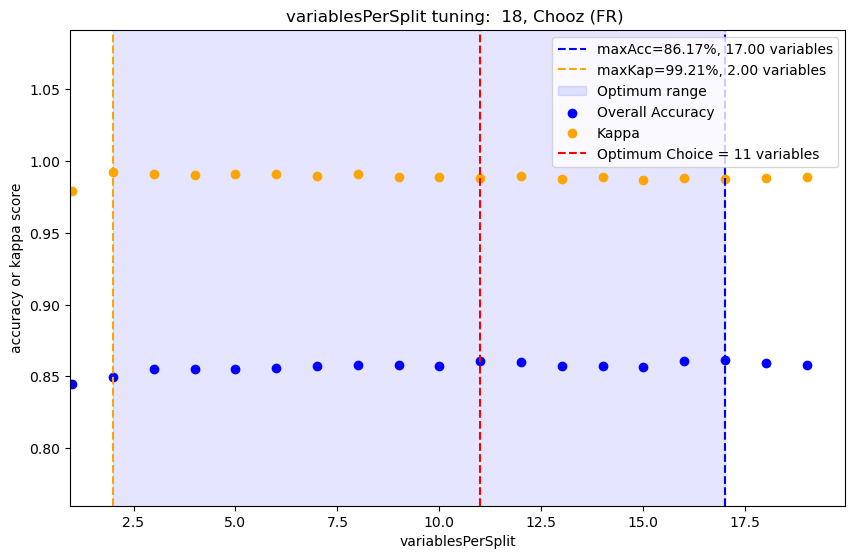

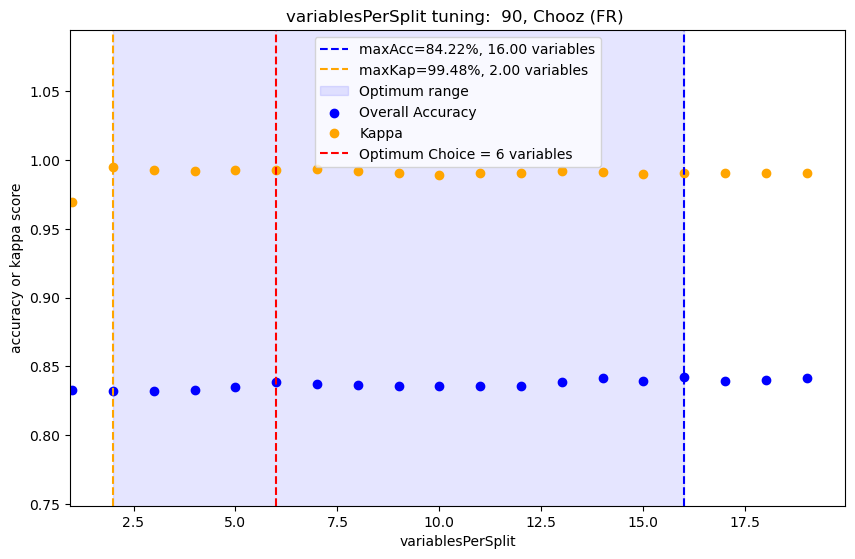

In [90]:
plotOptimumHP(18, 'variables', 'variablesPerSplit', VPSw18, 11)
plotOptimumHP(90, 'variables', 'variablesPerSplit', VPSw, 6)

In [91]:
MLPw18 = [
  {
    "acc1": 0.9929338609383833,
    "fscore": [
      "NaN",
      0.9798850574712644,
      0.99265605875153,
      0.9962732919254659,
      1,
      0.9824561403508771
    ],
    "kappa": 0.9883650600846977,
    "minimumLeafPopulation": 1,
    "testingAccuracy": 0.8609958506224067
  },
  {
    "acc1": 0.9609949123798757,
    "fscore": [
      "NaN",
      0.925207756232687,
      0.9458966565349545,
      0.9831432821021319,
      0.860215053763441,
      0.9202453987730062
    ],
    "kappa": 0.9355396536010904,
    "minimumLeafPopulation": 2,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9412097230073487,
    "fscore": [
      "NaN",
      0.8596491228070176,
      0.9144578313253012,
      0.9750678844729697,
      0.8449197860962567,
      0.9028340080971661
    ],
    "kappa": 0.9023981877647593,
    "minimumLeafPopulation": 3,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9262295081967213,
    "fscore": [
      "NaN",
      0.8281938325991189,
      0.8894173602853747,
      0.9680772086117297,
      0.8021978021978021,
      0.889795918367347
    ],
    "kappa": 0.8776051638639273,
    "minimumLeafPopulation": 4,
    "testingAccuracy": 0.851313969571231
  },
  {
    "acc1": 0.9120972300734879,
    "fscore": [
      "NaN",
      0.7867867867867867,
      0.8667058132706987,
      0.9624134520276953,
      0.7471264367816093,
      0.8834355828220858
    ],
    "kappa": 0.8538317364194795,
    "minimumLeafPopulation": 5,
    "testingAccuracy": 0.851313969571231
  },
  {
    "acc1": 0.9010740531373658,
    "fscore": [
      "NaN",
      0.7560240963855421,
      0.8480565371024734,
      0.9587756109602567,
      0.7100591715976331,
      0.8704453441295548
    ],
    "kappa": 0.8352821991176564,
    "minimumLeafPopulation": 6,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 0.8934426229508197,
    "fscore": [
      "NaN",
      0.7272727272727272,
      0.8367228355607205,
      0.9562638991845811,
      0.6867469879518073,
      0.8640973630831644
    ],
    "kappa": 0.8224592521444769,
    "minimumLeafPopulation": 7,
    "testingAccuracy": 0.8478561549100968
  },
  {
    "acc1": 0.8860938383267383,
    "fscore": [
      "NaN",
      0.7092846270928462,
      0.8310929281122151,
      0.9524279023909292,
      0.6257668711656442,
      0.8524590163934426
    ],
    "kappa": 0.8098823917194982,
    "minimumLeafPopulation": 8,
    "testingAccuracy": 0.8478561549100968
  },
  {
    "acc1": 0.8812888637648388,
    "fscore": [
      "NaN",
      0.6831530139103555,
      0.820661636680209,
      0.9521460286137149,
      0.638036809815951,
      0.8507157464212679
    ],
    "kappa": 0.8018488030998828,
    "minimumLeafPopulation": 9,
    "testingAccuracy": 0.8499308437067773
  },
  {
    "acc1": 0.8784624081401922,
    "fscore": [
      "NaN",
      0.6821705426356589,
      0.8182870370370371,
      0.9514180024660911,
      0.576923076923077,
      0.8414634146341463
    ],
    "kappa": 0.7969838353313033,
    "minimumLeafPopulation": 10,
    "testingAccuracy": 0.8499308437067773
  }
]

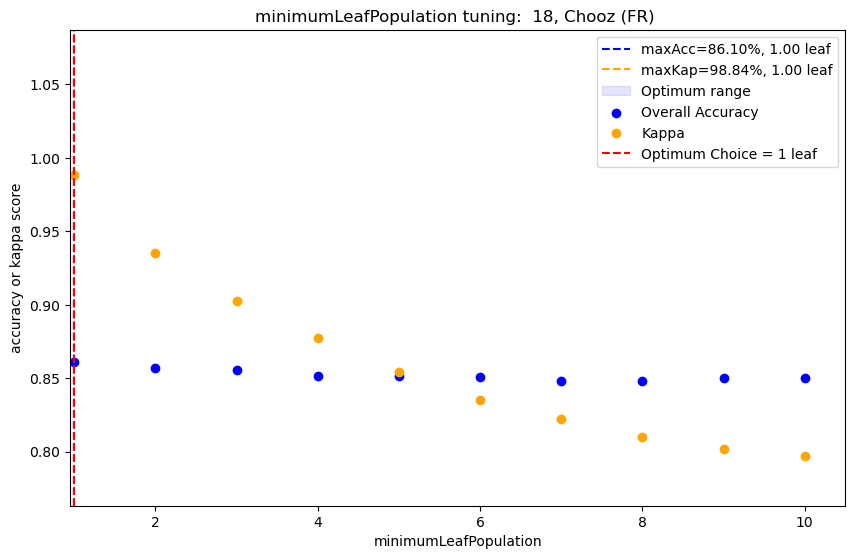

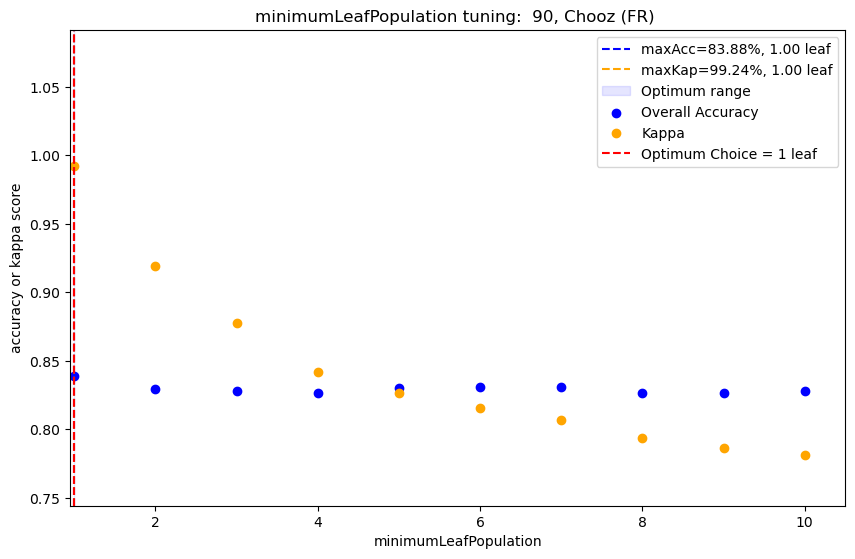

In [94]:
plotOptimumHP(18, 'leaf', 'minimumLeafPopulation', MLPw18, 1)
plotOptimumHP(90, 'leaf', 'minimumLeafPopulation', MLPw, 1)

In [95]:
BFw18 = [
  {
    "acc1": 0.8459581684567552,
    "bagFraction": 0.05,
    "fscore": [
      "NaN",
      0.6217948717948717,
      0.7858366647629925,
      0.9321992709599028,
      0.09174311926605505,
      0.7882599580712788
    ],
    "kappa": 0.7383845130730408,
    "testingAccuracy": 0.8409405255878285
  },
  {
    "acc1": 0.8651780667043527,
    "bagFraction": 0.1,
    "fscore": [
      "NaN",
      0.6517571884984026,
      0.8018486424032351,
      0.944662095984329,
      0.45517241379310347,
      0.820408163265306
    ],
    "kappa": 0.773207353096708,
    "testingAccuracy": 0.8520055325034578
  },
  {
    "acc1": 0.8866591294516676,
    "bagFraction": 0.15000000000000002,
    "fscore": [
      "NaN",
      0.7079365079365079,
      0.828505214368482,
      0.9543894065718489,
      0.5657894736842105,
      0.8571428571428573
    ],
    "kappa": 0.8097003924463796,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.9013566986998304,
    "bagFraction": 0.2,
    "fscore": [
      "NaN",
      0.7350157728706624,
      0.8521332554061952,
      0.960432538707299,
      0.7134502923976608,
      0.8635437881873727
    ],
    "kappa": 0.8349688819626315,
    "testingAccuracy": 0.8485477178423236
  },
  {
    "acc1": 0.9214245336348219,
    "bagFraction": 0.25,
    "fscore": [
      "NaN",
      0.7876923076923077,
      0.8775267538644471,
      0.9687115052968712,
      0.8342245989304812,
      0.8915662650602411
    ],
    "kappa": 0.8691497723207847,
    "testingAccuracy": 0.8609958506224067
  },
  {
    "acc1": 0.9431882419446015,
    "bagFraction": 0.3,
    "fscore": [
      "NaN",
      0.8597285067873303,
      0.9093107617896009,
      0.9745867258820627,
      0.9128205128205128,
      0.9236790606653621
    ],
    "kappa": 0.9057212390571355,
    "testingAccuracy": 0.8575380359612724
  },
  {
    "acc1": 0.9564725833804409,
    "bagFraction": 0.35000000000000003,
    "fscore": [
      "NaN",
      0.8967551622418879,
      0.934065934065934,
      0.980034508257333,
      0.923076923076923,
      0.9330708661417323
    ],
    "kappa": 0.9277716444328497,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9683436970039571,
    "bagFraction": 0.4,
    "fscore": [
      "NaN",
      0.9237536656891496,
      0.9508599508599508,
      0.9857001972386588,
      0.9447236180904524,
      0.9549902152641879
    ],
    "kappa": 0.9475231014046248,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9816280384397965,
    "bagFraction": 0.45,
    "fscore": [
      "NaN",
      0.956268221574344,
      0.9710769230769231,
      0.9906033630069239,
      0.9903846153846154,
      0.9746588693957114
    ],
    "kappa": 0.9696400223108935,
    "testingAccuracy": 0.8575380359612724
  },
  {
    "acc1": 0.9943470887507067,
    "bagFraction": 0.5,
    "fscore": [
      "NaN",
      0.9841269841269841,
      0.9945021380574222,
      0.9967701863354037,
      1,
      0.98635477582846
    ],
    "kappa": 0.9906903360530814,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 1,
    "bagFraction": 0.55,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 1,
    "bagFraction": 0.6000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "bagFraction": 0.6500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8582295988934993
  },
  {
    "acc1": 1,
    "bagFraction": 0.7000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 1,
    "bagFraction": 0.7500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 1,
    "bagFraction": 0.8,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 1,
    "bagFraction": 0.8500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 1,
    "bagFraction": 0.9000000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8533886583679114
  },
  {
    "acc1": 1,
    "bagFraction": 0.9500000000000001,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "testingAccuracy": 0.8478561549100968
  }
]


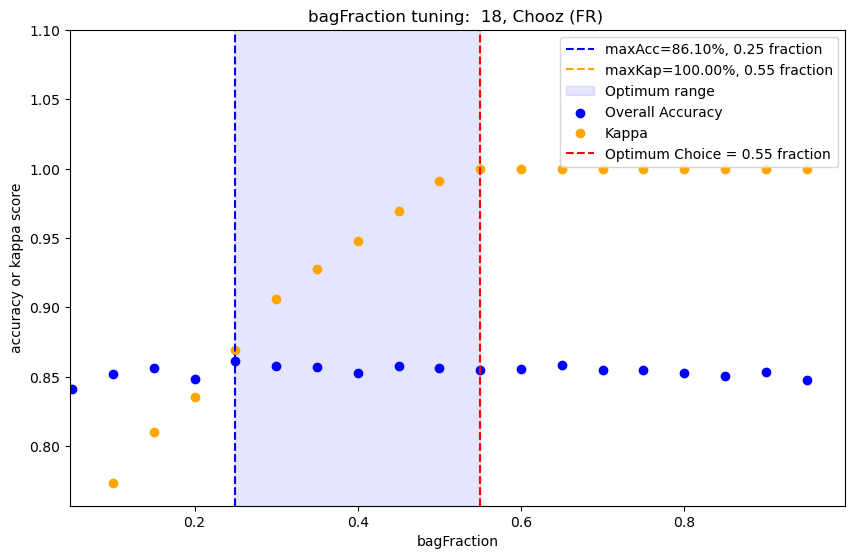

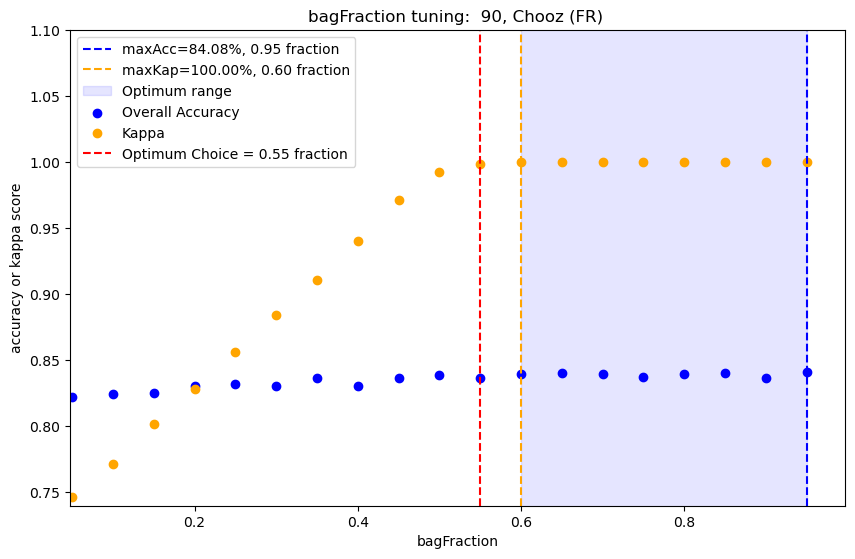

In [96]:
plotOptimumHP(18, 'fraction', 'bagFraction', BFw18, 0.55)
plotOptimumHP(90, 'fraction', 'bagFraction', BFw, 0.55)

In [97]:
MNw18 = [
  {
    "acc1": 0.818824194460147,
    "fscore": [
      "NaN",
      0.4942084942084943,
      0.744738262277388,
      0.9179140511830034,
      "NaN",
      0.775599128540305
    ],
    "kappa": 0.6882723834236847,
    "maxNodes": 10,
    "testingAccuracy": 0.8118948824343015
  },
  {
    "acc1": 0.8236291690220463,
    "fscore": [
      "NaN",
      0.5048169556840076,
      0.7521739130434781,
      0.9197396963123644,
      "NaN",
      0.7887931034482758
    ],
    "kappa": 0.696327685364345,
    "maxNodes": 20,
    "testingAccuracy": 0.813969571230982
  },
  {
    "acc1": 0.8321085358959864,
    "fscore": [
      "NaN",
      0.54820415879017,
      0.7643521049753965,
      0.9221499156423234,
      "NaN",
      0.8043010752688172
    ],
    "kappa": 0.7111347650698229,
    "maxNodes": 30,
    "testingAccuracy": 0.8160442600276625
  },
  {
    "acc1": 0.8422837761447145,
    "fscore": [
      "NaN",
      0.5793357933579336,
      0.7795100222717148,
      0.9264776549735704,
      "NaN",
      0.826271186440678
    ],
    "kappa": 0.7284355542643592,
    "maxNodes": 40,
    "testingAccuracy": 0.8188105117565698
  },
  {
    "acc1": 0.8493499152063313,
    "fscore": [
      "NaN",
      0.6145454545454546,
      0.788795518207283,
      0.9281077182014908,
      0.03773584905660378,
      0.8403361344537814
    ],
    "kappa": 0.7409935087472794,
    "maxNodes": 50,
    "testingAccuracy": 0.8215767634854771
  },
  {
    "acc1": 0.8566986998304127,
    "fscore": [
      "NaN",
      0.6418439716312058,
      0.7997737556561086,
      0.9309265944645005,
      0.1090909090909091,
      0.8475991649269311
    ],
    "kappa": 0.7541625140203209,
    "maxNodes": 60,
    "testingAccuracy": 0.8291839557399724
  },
  {
    "acc1": 0.8643301300169587,
    "fscore": [
      "NaN",
      0.6690017513134852,
      0.8111174134997164,
      0.9336550060313631,
      0.19130434782608693,
      0.8547717842323652
    ],
    "kappa": 0.7679046252886431,
    "maxNodes": 70,
    "testingAccuracy": 0.8298755186721992
  },
  {
    "acc1": 0.8750706613906162,
    "fscore": [
      "NaN",
      0.7008547008547008,
      0.8306818181818182,
      0.9389830508474576,
      0.23728813559322035,
      0.8571428571428572
    ],
    "kappa": 0.7870680331492811,
    "maxNodes": 80,
    "testingAccuracy": 0.830567081604426
  },
  {
    "acc1": 0.8784624081401922,
    "fscore": [
      "NaN",
      0.7142857142857142,
      0.8341880341880342,
      0.939893359185652,
      0.2809917355371901,
      0.8641975308641975
    ],
    "kappa": 0.7931304470443235,
    "maxNodes": 90,
    "testingAccuracy": 0.8381742738589212
  },
  {
    "acc1": 0.8858111927642736,
    "fscore": [
      "NaN",
      0.7437185929648242,
      0.8441633122484186,
      0.9425732977950084,
      0.32258064516129037,
      0.8711656441717791
    ],
    "kappa": 0.8058189961426048,
    "maxNodes": 100,
    "testingAccuracy": 0.8381742738589212
  },
  {
    "acc1": 0.8925946862634256,
    "fscore": [
      "NaN",
      0.7603305785123967,
      0.8521739130434783,
      0.9459655924400292,
      0.3875968992248062,
      0.8816326530612245
    ],
    "kappa": 0.817549173675968,
    "maxNodes": 110,
    "testingAccuracy": 0.838865836791148
  },
  {
    "acc1": 0.8988128886376484,
    "fscore": [
      "NaN",
      0.7697368421052632,
      0.858974358974359,
      0.9500484966052376,
      0.4927536231884058,
      0.8816326530612245
    ],
    "kappa": 0.8283774881188438,
    "maxNodes": 120,
    "testingAccuracy": 0.8416320885200553
  },
  {
    "acc1": 0.9092707744488412,
    "fscore": [
      "NaN",
      0.7927631578947368,
      0.8715542521994134,
      0.9538386783284742,
      0.6133333333333333,
      0.9014084507042254
    ],
    "kappa": 0.8465729314834872,
    "maxNodes": 130,
    "testingAccuracy": 0.8457814661134163
  },
  {
    "acc1": 0.9180327868852459,
    "fscore": [
      "NaN",
      0.8143322475570033,
      0.8794326241134752,
      0.9576229907452508,
      0.7080745341614907,
      0.9184890656063619
    ],
    "kappa": 0.861873826758153,
    "maxNodes": 140,
    "testingAccuracy": 0.8506224066390041
  },
  {
    "acc1": 0.9219898247597512,
    "fscore": [
      "NaN",
      0.8214285714285714,
      0.8853238265002972,
      0.9595910418695228,
      0.7393939393939394,
      0.9206349206349206
    ],
    "kappa": 0.8685766467319731,
    "maxNodes": 150,
    "testingAccuracy": 0.8520055325034578
  },
  {
    "acc1": 0.928208027133974,
    "fscore": [
      "NaN",
      0.8416,
      0.8932617769827073,
      0.9629268292682926,
      0.7544910179640718,
      0.9270216962524654
    ],
    "kappa": 0.8793260374526884,
    "maxNodes": 160,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9349915206331261,
    "fscore": [
      "NaN",
      0.8589540412044374,
      0.9029940119760478,
      0.9663085937499999,
      0.7764705882352941,
      0.9351669941060904
    ],
    "kappa": 0.8908869687739138,
    "maxNodes": 170,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9412097230073487,
    "fscore": [
      "NaN",
      0.8802488335925349,
      0.9130434782608696,
      0.9684981684981685,
      0.7976878612716763,
      0.9390962671905698
    ],
    "kappa": 0.9014418025645884,
    "maxNodes": 180,
    "testingAccuracy": 0.8582295988934993
  },
  {
    "acc1": 0.9457320520067835,
    "fscore": [
      "NaN",
      0.893682588597843,
      0.920845921450151,
      0.9704084128148691,
      0.7976878612716763,
      0.9450980392156861
    ],
    "kappa": 0.9091511405992343,
    "maxNodes": 190,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9513849632560769,
    "fscore": [
      "NaN",
      0.9018404907975459,
      0.9300911854103344,
      0.9726161369193154,
      0.8248587570621468,
      0.95703125
    ],
    "kappa": 0.9186600242281213,
    "maxNodes": 200,
    "testingAccuracy": 0.8526970954356846
  },
  {
    "acc1": 0.9559072922555116,
    "fscore": [
      "NaN",
      0.9115853658536585,
      0.937080024434942,
      0.9748227817159618,
      0.8379888268156424,
      0.9629629629629629
    ],
    "kappa": 0.9262527346501165,
    "maxNodes": 210,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.9609949123798757,
    "fscore": [
      "NaN",
      0.9279279279279279,
      0.9463955637707949,
      0.9762894157907602,
      0.8571428571428571,
      0.9649805447470817
    ],
    "kappa": 0.9348261281225279,
    "maxNodes": 220,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.964104013566987,
    "fscore": [
      "NaN",
      0.933933933933934,
      0.9518518518518518,
      0.9772671718406257,
      0.8633879781420765,
      0.9728682170542635
    ],
    "kappa": 0.9400358349563512,
    "maxNodes": 230,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9669304691916337,
    "fscore": [
      "NaN",
      0.9462686567164179,
      0.9566294919454771,
      0.9782555582702175,
      0.8633879781420765,
      0.9728682170542635
    ],
    "kappa": 0.9447535741359615,
    "maxNodes": 240,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.9723007348784624,
    "fscore": [
      "NaN",
      0.9602356406480117,
      0.9645301804604854,
      0.9804592085979482,
      0.8756756756756757,
      0.9823874755381604
    ],
    "kappa": 0.9537352311917445,
    "maxNodes": 250,
    "testingAccuracy": 0.8547717842323651
  },
  {
    "acc1": 0.9765404183154325,
    "fscore": [
      "NaN",
      0.972181551976574,
      0.9688667496886676,
      0.9823788546255506,
      0.9052631578947368,
      0.9863013698630138
    ],
    "kappa": 0.9608947021133086,
    "maxNodes": 260,
    "testingAccuracy": 0.8540802213001383
  },
  {
    "acc1": 0.9799321650650085,
    "fscore": [
      "NaN",
      0.9766763848396501,
      0.9707529558182949,
      0.9845474613686535,
      0.9441624365482234,
      0.9901768172888016
    ],
    "kappa": 0.9666196210419784,
    "maxNodes": 270,
    "testingAccuracy": 0.8575380359612724
  },
  {
    "acc1": 0.9824759751271905,
    "fscore": [
      "NaN",
      0.9781659388646288,
      0.9732420659614188,
      0.9862475442043221,
      0.9702970297029703,
      0.9921259842519685
    ],
    "kappa": 0.970887437068284,
    "maxNodes": 280,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9855850763143018,
    "fscore": [
      "NaN",
      0.9826086956521739,
      0.9788557213930348,
      0.9881947860304967,
      0.9803921568627451,
      0.9921259842519685
    ],
    "kappa": 0.9760842526497944,
    "maxNodes": 290,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9901074053137365,
    "fscore": [
      "NaN",
      0.9913793103448275,
      0.9863523573200993,
      0.9913686806411837,
      0.9853658536585366,
      0.9921259842519685
    ],
    "kappa": 0.9836233337671172,
    "maxNodes": 300,
    "testingAccuracy": 0.8575380359612724
  },
  {
    "acc1": 0.9926512153759186,
    "fscore": [
      "NaN",
      0.994269340974212,
      0.9888613861386139,
      0.9935739001482946,
      0.9951690821256038,
      0.9941060903732809
    ],
    "kappa": 0.9878564081117103,
    "maxNodes": 310,
    "testingAccuracy": 0.8568464730290456
  },
  {
    "acc1": 0.9946297343131713,
    "fscore": [
      "NaN",
      0.9957081545064378,
      0.9926017262638718,
      0.9952958653131964,
      0.9951690821256038,
      0.9941060903732809
    ],
    "kappa": 0.9911361538302295,
    "maxNodes": 320,
    "testingAccuracy": 0.8561549100968188
  },
  {
    "acc1": 0.996608253250424,
    "fscore": [
      "NaN",
      0.9957081545064378,
      0.9956976029502151,
      0.9970238095238095,
      1,
      0.996078431372549
    ],
    "kappa": 0.9944088773163665,
    "maxNodes": 330,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 0.9997173544375353,
    "fscore": [
      "NaN",
      1,
      0.9993876301285977,
      0.9997513056453617,
      1,
      1
    ],
    "kappa": 0.99953503097406,
    "maxNodes": 340,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 350,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 360,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 370,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 380,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 390,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 400,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 410,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 420,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 430,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 440,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 450,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 460,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 470,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 480,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 490,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 500,
    "testingAccuracy": 0.8554633471645919
  },
    
    {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 500,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 510,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 520,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 530,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 540,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 550,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 560,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 570,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 580,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 590,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 600,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 610,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 620,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 630,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 640,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 650,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 660,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 670,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 680,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 690,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 700,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 710,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 720,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 730,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 740,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 750,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 760,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 770,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 780,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 790,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 800,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 810,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 820,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 830,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 840,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 850,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 860,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 870,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 880,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 890,
    "testingAccuracy": 0.8554633471645919
  },
  {
    "acc1": 1,
    "fscore": [
      "NaN",
      1,
      1,
      1,
      1,
      1
    ],
    "kappa": 1,
    "maxNodes": 900,
    "testingAccuracy": 0.8554633471645919
  }
]


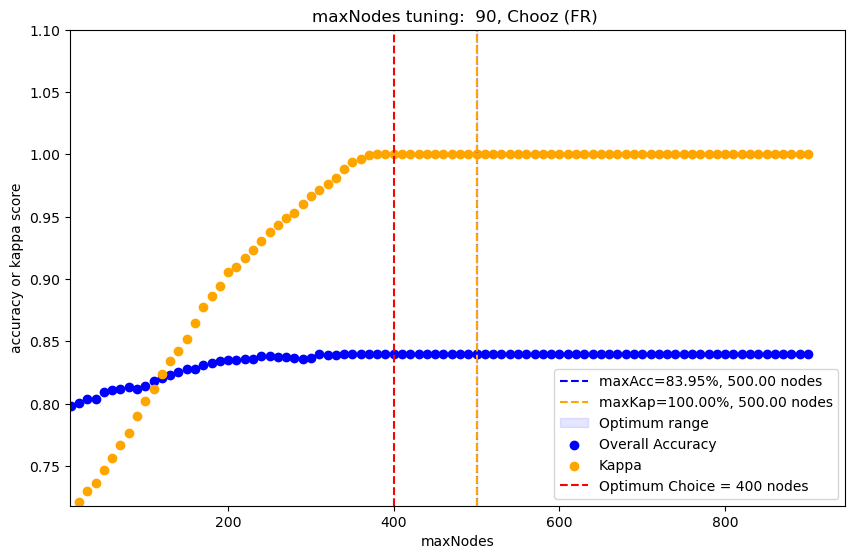

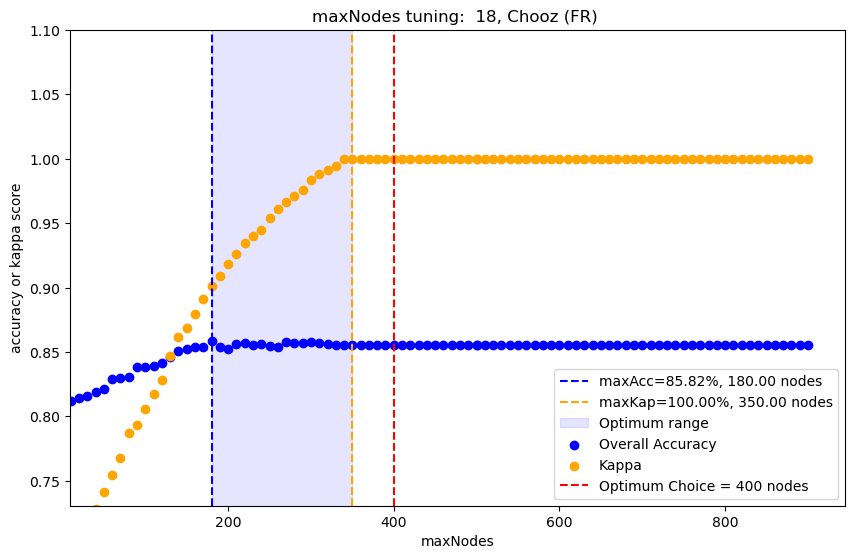

In [98]:
plotOptimumHP(90, 'nodes', 'maxNodes', MNw, 400)
plotOptimumHP(18, 'nodes', 'maxNodes', MNw18, 400)

In [100]:
accuracy = [0.763,0.810,0.8,0.831,0.831,0.826,0.945,0.810,0.803,0.794,0.826,0.793,0.759,0.782,0.769,0.856,0.957,0.832,0.803,0.826,0.708,0.824,0.955,0.740,0.780,0.847,0.684,0.718,0.960,0.746,0.684,0.819,0.806,0.759
        ]